#### VAISHNAVI J P - PES1UG23CS900
#### Y BHUVANESWARI - PES1UG23CS720 



### OUR TEAM HAS SUBMITTED THE NOTEBOOK VIA GIVEN GOOGLE FORMS AS WELL

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orange_1/sample.csv
/kaggle/input/orange_1/train.csv
/kaggle/input/orange_1/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/orange_1/train.csv")
test  = pd.read_csv("/kaggle/input/orange_1/test.csv")


In [3]:
train.head()

,company_name,industry,country,genai_tool,adoption_year,productivity_change_pct,employees_impacted,new_roles_created,training_hours,deployment_cost,employee_sentiment_score,automation_coverage_pct,voluntary_attritions,genai_role_salary,Client_Satisfaction_Post_GenAI
0,"Nelson, Bush and Wood Pvt. Ltd.",Technology,USA,ChatGPT,2023.0,14.794203,487.0,20,40.2,535791.46,6.87,66.3,46.0,149632.02,10.0
1,Marshall-Bolton Pvt. Ltd.,Entertainment,UK,LLaMA,2022.0,7.257550,449.0,17,33.0,459384.25,5.47,47.1,66.0,97781.05,10.0
2,"Craig, Walker and Perez Pvt. Ltd.",Healthcare,South Korea,ChatGPT,2022.0,14.566661,500.0,23,39.9,541500.68,6.70,64.4,41.0,87145.46,10.0
3,"Navarro, Higgins and Bowman Pvt. Ltd.",Entertainment,Brazil,ChatGPT,2023.0,14.847299,487.0,16,52.6,531076.78,8.25,62.6,49.0,48057.74,10.0
4,Curtis-Williams Pvt. Ltd.,Hospitality,South Africa,ChatGPT,2023.0,14.924988,451.0,20,37.8,522063.39,6.35,57.5,48.0,27567.03,10.0


## Task 1

#### Data Exploration and Preparation

You’ve received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to assess the dataset’s consistency and prepare it for reliable and accurate results. Your task is to explore the data thoroughly and identify any potential issues that could impact your findings.

Evaluate the completeness and consistency of the data. Look for anomalies, any values or patterns that appear unusual or unexpected. Use appropriate visualizations to highlight these irregularities effectively.

Determine how to address these issues and clearly justify your approach. Your goal is to prepare a clean, reliable dataset that you can confidently use for analysis and modeling.

Data preprocessing is a critical phase ensure your work is meticulous and well-documented, as it will serve as the foundation for all future tasks.

(1 point)

In [4]:
# Your code here, along with reasoning
# Cell 1 — Imports & load
# Reasoning: import libs and verify dataset paths so subsequent cells run safely in the Kaggle environment.
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Paths used in this competition
TRAIN_PATH = "/kaggle/input/orange_1/train.csv"
TEST_PATH  = "/kaggle/input/orange_1/test.csv"
SAMPLE_PATH = "/kaggle/input/orange_1/sample.csv"

# Defensive: confirm paths exist
for p in [TRAIN_PATH, TEST_PATH, SAMPLE_PATH]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Expected file not found: {p}\nMake sure the competition dataset is attached to the Kernel.")

# Load
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_submission = pd.read_csv(SAMPLE_PATH)

print("Train shape:", train.shape)
print("Test  shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)
display(train.head(3))


Train shape: (75000, 15)
Test  shape: (25000, 13)
Sample submission shape: (25000, 3)


,company_name,industry,country,genai_tool,adoption_year,productivity_change_pct,employees_impacted,new_roles_created,training_hours,deployment_cost,employee_sentiment_score,automation_coverage_pct,voluntary_attritions,genai_role_salary,Client_Satisfaction_Post_GenAI
0,"Nelson, Bush and Wood Pvt. Ltd.",Technology,USA,ChatGPT,2023.0,14.794203,487.0,20,40.2,535791.46,6.87,66.3,46.0,149632.02,10.0
1,Marshall-Bolton Pvt. Ltd.,Entertainment,UK,LLaMA,2022.0,7.257550,449.0,17,33.0,459384.25,5.47,47.1,66.0,97781.05,10.0
2,"Craig, Walker and Perez Pvt. Ltd.",Healthcare,South Korea,ChatGPT,2022.0,14.566661,500.0,23,39.9,541500.68,6.70,64.4,41.0,87145.46,10.0


In [5]:
# Cell 2 — Basic overview and missingness
# Reasoning: Understand column types, missingness, cardinality; these guide cleaning decisions.

def percent(x, n):
    return f"{(x/n*100):.2f}%"

# Basic info
print("---- Train info ----")
display(train.info())
print("\n---- Test info ----")
display(test.info())

# Summary stats
print("\n---- Numeric describe (train) ----")
display(train.describe().T)

print("\n---- Missing values (train) ----")
miss_train = train.isnull().sum().sort_values(ascending=False)
miss_train = pd.concat([miss_train, (miss_train / train.shape[0])], axis=1)
miss_train.columns = ["missing_count", "missing_frac"]
display(miss_train[miss_train['missing_count']>0])

print("\n---- Missing values (test) ----")
miss_test = test.isnull().sum().sort_values(ascending=False)
miss_test = pd.concat([miss_test, (miss_test / test.shape[0])], axis=1)
miss_test.columns = ["missing_count", "missing_frac"]
display(miss_test[miss_test['missing_count']>0])

# Unique values for each column (helpful for categorical decision)
print("\n---- Unique counts (train) ----")
uniques = train.nunique().sort_values(ascending=False)
display(uniques.to_frame(name="unique_count").head(50))


---- Train info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company_name                    75000 non-null  object 
 1   industry                        75000 non-null  object 
 2   country                         75000 non-null  object 
 3   genai_tool                      75000 non-null  object 
 4   adoption_year                   71528 non-null  float64
 5   productivity_change_pct         75000 non-null  float64
 6   employees_impacted              74741 non-null  float64
 7   new_roles_created               75000 non-null  int64  
 8   training_hours                  75000 non-null  float64
 9   deployment_cost                 75000 non-null  float64
 10  employee_sentiment_score        75000 non-null  float64
 11  automation_coverage_pct         75000 non-null  float64
 12  voluntary_a

None


---- Test info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company_name                    25000 non-null  object 
 1   industry                        25000 non-null  object 
 2   country                         25000 non-null  object 
 3   genai_tool                      25000 non-null  object 
 4   adoption_year                   25000 non-null  int64  
 5   new_roles_created               25000 non-null  int64  
 6   training_hours                  25000 non-null  float64
 7   deployment_cost                 25000 non-null  float64
 8   employee_sentiment_score        25000 non-null  float64
 9   automation_coverage_pct         25000 non-null  float64
 10  voluntary_attritions            25000 non-null  int64  
 11  genai_role_salary               25000 non-null  float64
 12  Client_Sati

None


---- Numeric describe (train) ----


,count,mean,std,min,25%,50%,75%,max
adoption_year,71528.0,2023.001873,0.816198,2022.000000,2022.000000,2023.000000,2024.000000,2024.000000
productivity_change_pct,75000.0,9.951309,3.756719,0.215437,6.988005,8.948706,13.513513,20.846688
employees_impacted,74741.0,409.836248,72.142174,148.000000,366.000000,413.000000,459.000000,682.000000
new_roles_created,75000.0,15.378240,3.439508,0.000000,13.000000,15.000000,18.000000,28.000000
training_hours,75000.0,33.768101,6.769905,5.000000,29.300000,34.000000,38.400000,57.800000
deployment_cost,75000.0,476490.566706,42366.302846,386387.130000,442324.422500,475197.625000,515865.922500,550000.000000
employee_sentiment_score,75000.0,5.567413,1.337086,0.400000,4.680000,5.650000,6.520000,10.000000
automation_coverage_pct,75000.0,53.563937,8.230371,26.000000,47.500000,52.700000,59.300000,86.200000
voluntary_attritions,71250.0,44.948267,8.227286,20.000000,39.000000,44.000000,51.000000,84.000000
genai_role_salary,70298.0,77253.769841,29000.103901,10433.440000,61231.650000,80995.870000,97558.975000,157515.150000



---- Missing values (train) ----


,missing_count,missing_frac
genai_role_salary,4702,0.062693
voluntary_attritions,3750,0.050000
adoption_year,3472,0.046293
employees_impacted,259,0.003453



---- Missing values (test) ----


,missing_count,missing_frac



---- Unique counts (train) ----


,unique_count
company_name,75000
productivity_change_pct,75000
deployment_cost,74322
genai_role_salary,70001
employee_sentiment_score,852
automation_coverage_pct,514
training_hours,473
employees_impacted,466
Client_Satisfaction_Post_GenAI,314
voluntary_attritions,59


In [6]:
# Cell 3 — Identify ID & targets, and separate features into types
# Reasoning: We'll exclude ID and target columns from transformations and treat categorical/numeric differently.

# Identify ID column (common name in this competition)
if 'company_name' in train.columns:
    ID_COL = 'company_name'
else:
    # fallback: first column
    ID_COL = train.columns[0]

TARGETS = ['productivity_change_pct', 'employees_impacted']
for t in TARGETS:
    if t not in train.columns:
        raise ValueError(f"Expected target column {t} not found in train.")

features = [c for c in train.columns if c not in [ID_COL] + TARGETS]
print("ID column:", ID_COL)
print("Number of features:", len(features))

# Auto-detect categorical vs numeric
cat_cols = [c for c in features if train[c].dtype == "object" or train[c].nunique() < 50]
num_cols = [c for c in features if c not in cat_cols]

print("Numeric features (count):", len(num_cols))
print(num_cols[:20])
print("Categorical features (count):", len(cat_cols))
print(cat_cols[:20])


ID column: company_name
Number of features: 12
Numeric features (count): 7
['training_hours', 'deployment_cost', 'employee_sentiment_score', 'automation_coverage_pct', 'voluntary_attritions', 'genai_role_salary', 'Client_Satisfaction_Post_GenAI']
Categorical features (count): 5
['industry', 'country', 'genai_tool', 'adoption_year', 'new_roles_created']


In [7]:
# Cell 4 — Duplicates and constant columns
# Reasoning: remove exact duplicates and drop constant columns (no information).

# duplicates
dups = train.duplicated()
print("Duplicate rows in train:", dups.sum())

if dups.sum() > 0:
    print("Dropping duplicate rows from train.")
    train = train.drop_duplicates().reset_index(drop=True)

# constant columns (zero variance)
const_cols = [c for c in features if train[c].nunique() <= 1]
print("Constant columns (no variance):", const_cols)
# We will drop them from features (they cannot help models)
features = [c for c in features if c not in const_cols]
cat_cols = [c for c in cat_cols if c not in const_cols]
num_cols = [c for c in num_cols if c not in const_cols]
print("Updated feature count:", len(features))


Duplicate rows in train: 0
Constant columns (no variance): []
Updated feature count: 12


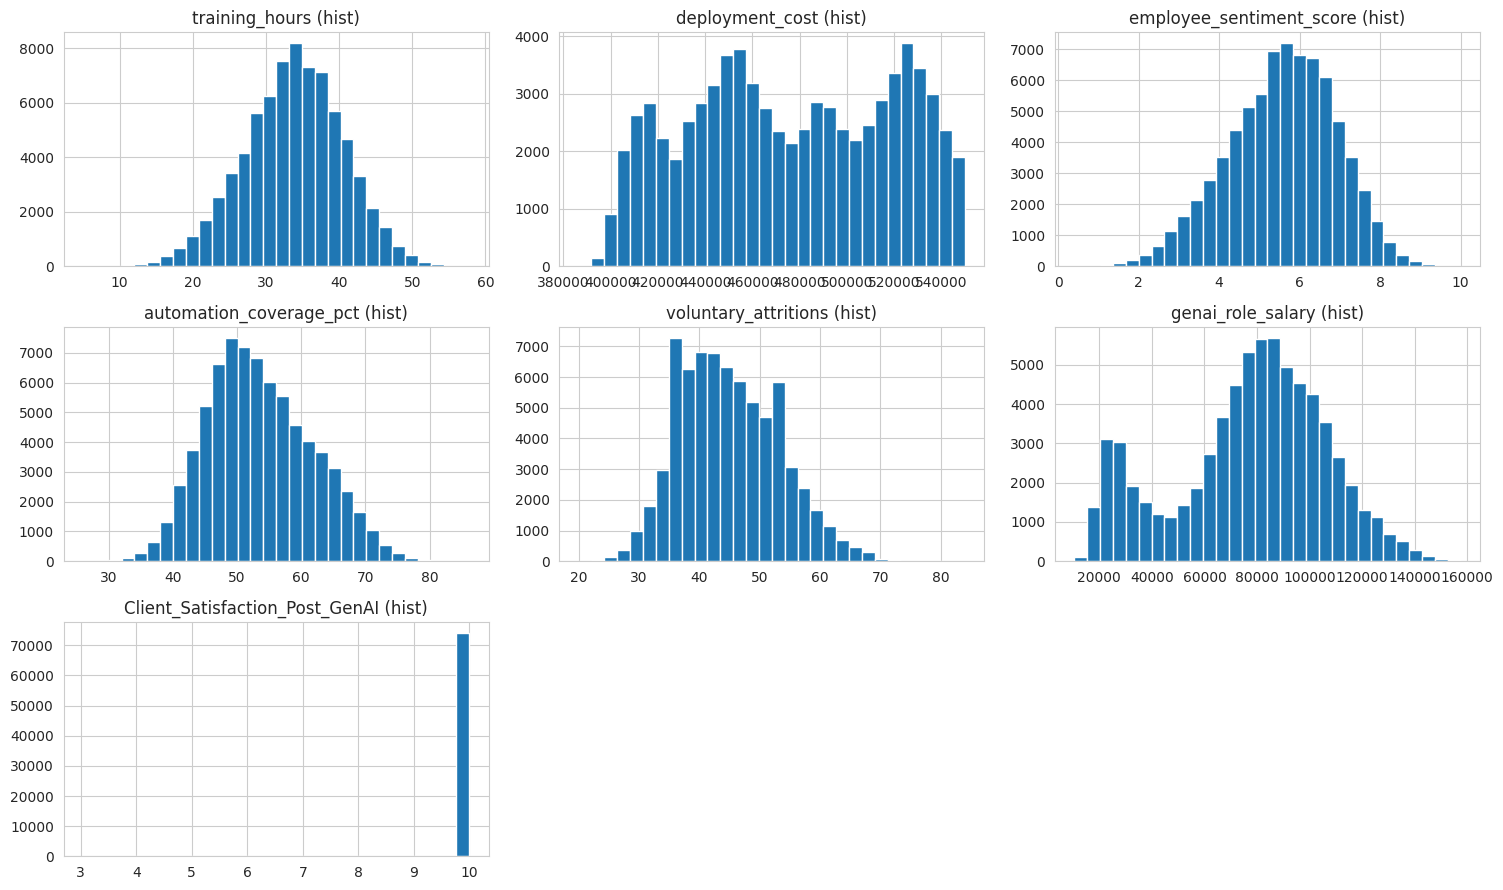

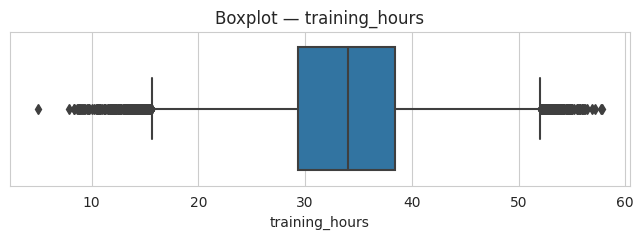

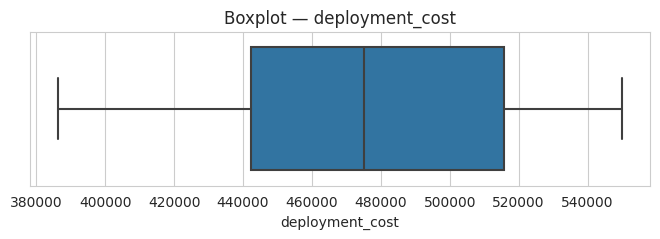

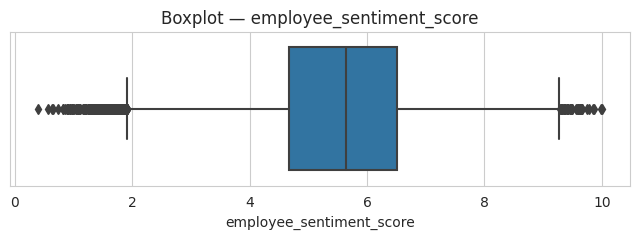

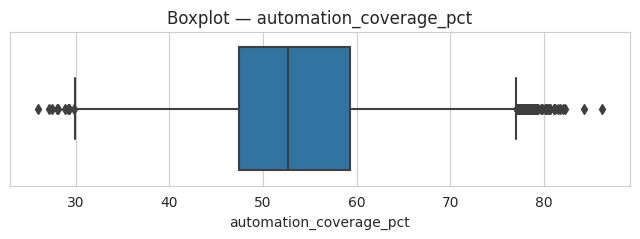

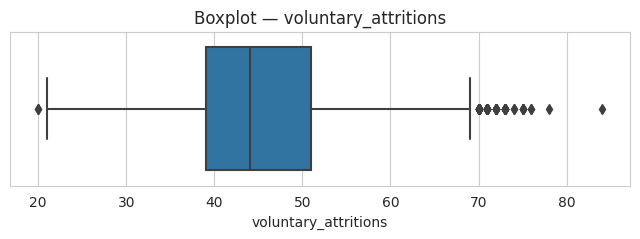

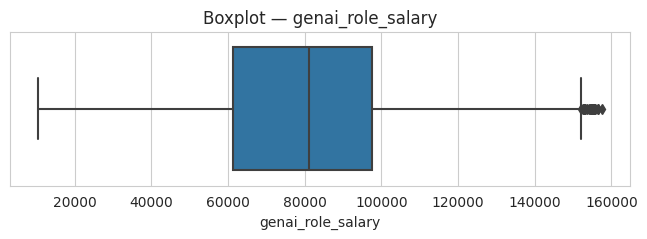

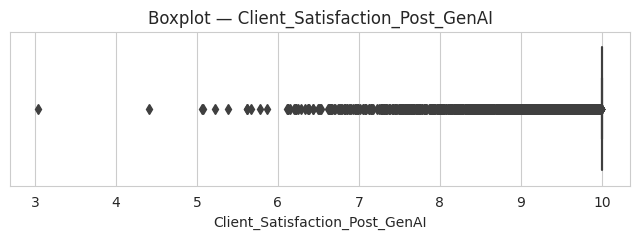

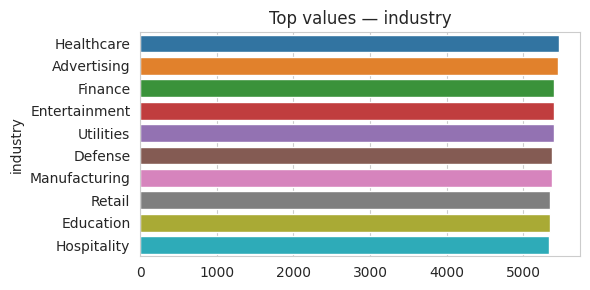

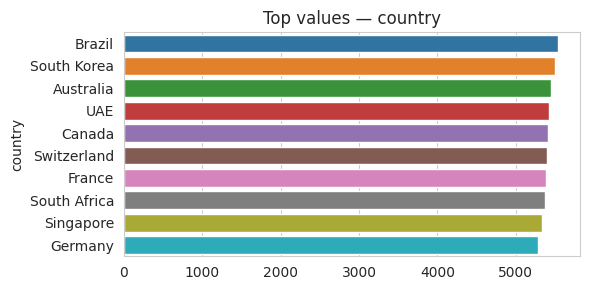

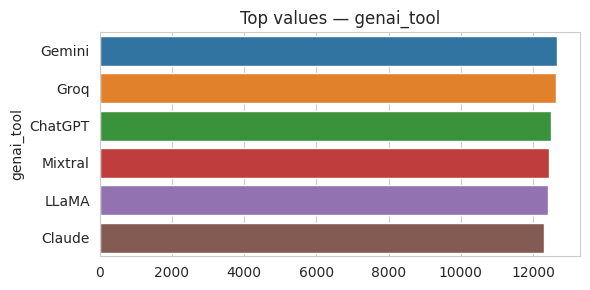

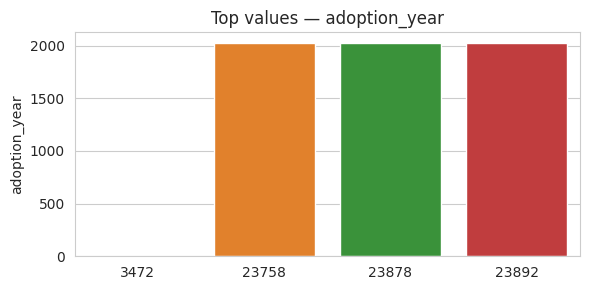

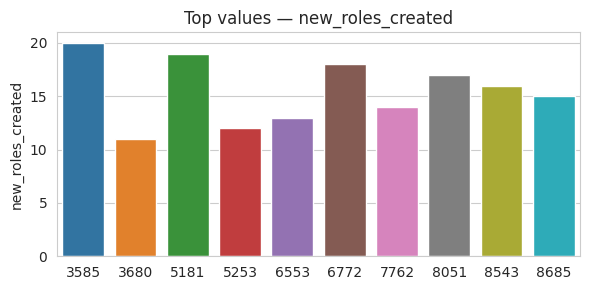

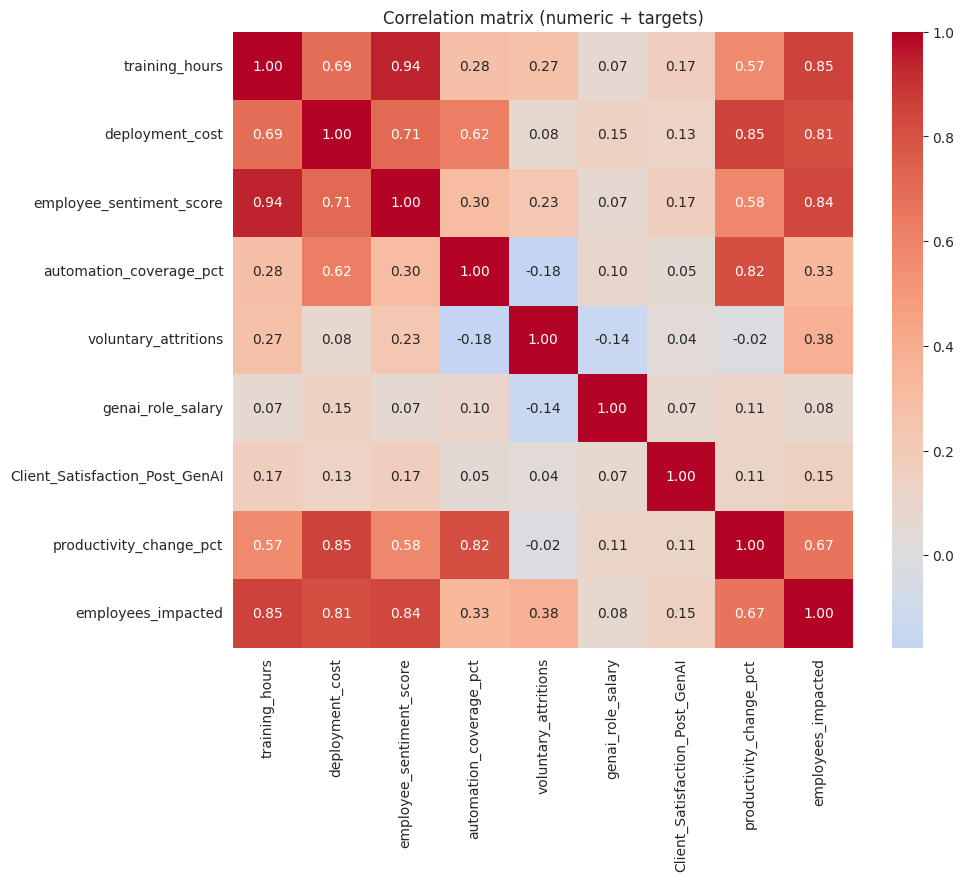

In [8]:
# Cell 5 — Visual EDA
# Reasoning: Visuals to detect skew, outliers and relationships. Limit plots to avoid overloading the kernel.

import math
sns.set_style("whitegrid")

# Numeric histograms (limit to first 12 numeric cols to keep notebook compact)
plot_num = num_cols[:12]
if len(plot_num) > 0:
    ncols = 3
    nrows = math.ceil(len(plot_num)/ncols)
    plt.figure(figsize=(5*ncols, 3*nrows))
    for i, col in enumerate(plot_num, 1):
        plt.subplot(nrows, ncols, i)
        plt.hist(train[col].dropna(), bins=30)
        plt.title(f"{col} (hist)")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")

# Boxplots to highlight outliers (first 8 numeric)
plot_box = num_cols[:8]
for col in plot_box:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=train[col].dropna())
    plt.title(f"Boxplot — {col}")
    plt.show()

# Categorical: top 10 value counts for each cat (limit to first 8 cats)
for col in cat_cols[:8]:
    vc = train[col].value_counts(dropna=False).head(10)
    plt.figure(figsize=(6,3))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top values — {col}")
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric columns (if >1 numeric column)
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    corr = train[num_cols + TARGETS].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation matrix (numeric + targets)")
    plt.show()


In [9]:
# Cell 6 — Anomaly detection
# Reasoning: Use IQR to flag extreme outliers; also check for logically impossible negative counts.

def iqr_outliers(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return series[(series < low) | (series > high)], low, high

outlier_summary = {}
for col in num_cols:
    s = train[col].dropna()
    if s.empty: 
        continue
    out, low, high = iqr_outliers(s)
    outlier_summary[col] = {"outlier_count": len(out), "low_bound": low, "high_bound": high, "min": s.min(), "max": s.max()}
    
# Display columns with many outliers (arbitrary threshold: >1% rows)
n = train.shape[0]
print("Columns with >1% outliers (IQR method):")
for col, info in outlier_summary.items():
    if info['outlier_count'] / n > 0.01:
        print(f" - {col}: {info['outlier_count']} outliers ({info['outlier_count']/n:.2%}), min={info['min']}, max={info['max']}, bounds=({info['low_bound']:.2f}, {info['high_bound']:.2f})")

# Example: show top rows that are extreme for each such column
for col, info in outlier_summary.items():
    if info['outlier_count'] / n > 0.01:
        outrows = train[train[col] > info['high_bound']].sort_values(col, ascending=False).head(10)
        if not outrows.empty:
            print(f"\nTop outliers for {col}:")
            display(outrows[[ID_COL, col] + TARGETS].head(10))

# Negative values for count-like columns (employees_impacted is a target — we check features)
print("\nCheck numeric columns for negative values (which may be invalid):")
negatives = {col: (train[col] < 0).sum() for col in num_cols if train[col].dtype != 'object'}
for col, cnt in negatives.items():
    if cnt > 0:
        print(f" - {col}: {cnt} negative values")
if not negatives:
    print("No negative-values checks flagged (or no numeric columns).")


Columns with >1% outliers (IQR method):
 - Client_Satisfaction_Post_GenAI: 1304 outliers (1.74%), min=3.04, max=10.0, bounds=(10.00, 10.00)

Check numeric columns for negative values (which may be invalid):


In [10]:
import pandas as pd

# --------------------
# Step 1: Load datasets
# --------------------
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)

# Work only on train first (you can apply same steps to test later)
df = train_df.copy()

# --------------------
# Step 2: Clean dataset
# --------------------
clean_df = df.copy()

# Handle missing values
for col in clean_df.columns:
    if clean_df[col].dtype == "object":
        mode = clean_df[col].mode()[0]
        clean_df[col] = clean_df[col].replace({'nan': None}).fillna(mode)
    else:
        clean_df[col] = clean_df[col].fillna(clean_df[col].median())

# Remove constant columns
const_cols = [c for c in clean_df.columns if clean_df[c].nunique() <= 1]
clean_df.drop(columns=const_cols, inplace=True)

print("Removed constant cols:", const_cols)
print("Final cleaned shape:", clean_df.shape)

# --------------------
# Step 3: Apply same cleaning to test set
# --------------------
clean_test = test_df.copy()

for col in clean_test.columns:
    if col in clean_df.columns:  # only keep valid cols
        if clean_test[col].dtype == "object":
            mode = clean_test[col].mode()[0] if not clean_test[col].mode().empty else "__MISSING__"
            clean_test[col] = clean_test[col].replace({'nan': None}).fillna(mode)
        else:
            clean_test[col] = clean_test[col].fillna(clean_test[col].median())

clean_test.drop(columns=[c for c in const_cols if c in clean_test.columns], inplace=True)

print("Final test shape:", clean_test.shape)


Removed constant cols: []
Final cleaned shape: (75000, 15)
Final test shape: (25000, 13)


In [11]:
# Cell 8 — Save cleaned data and document actions
# Reasoning: Save cleaned versions so modeling cells use identical transforms for reproducibility.

CLEAN_TRAIN_PATH = "cleaned_train_task1.csv"
CLEAN_TEST_PATH  = "cleaned_test_task1.csv"

clean_df.to_csv(CLEAN_TRAIN_PATH, index=False)   # <-- fixed name
clean_test.to_csv(CLEAN_TEST_PATH, index=False)

print("Saved cleaned_train ->", CLEAN_TRAIN_PATH)
print("Saved cleaned_test  ->", CLEAN_TEST_PATH)

# Summarize cleaning actions (helpful for the report)
actions = {
    "duplicates_removed": 0,   # update if you handled duplicates earlier
    "constant_columns_removed": const_cols,
    "numeric_imputation": "median (train medians applied to test)",
    "categorical_imputation": "fill with mode or '__MISSING__' (train); normalized strings",
    "negative_clipping": "clipped negative values to 0 for integer-like features (if any)",
    "skewness_report": None    # replace with top_skewed if you generated it
}
print("\nCleaning actions summary:")
for k, v in actions.items():
    print(f"{k}: {v}")


Saved cleaned_train -> cleaned_train_task1.csv
Saved cleaned_test  -> cleaned_test_task1.csv

Cleaning actions summary:
duplicates_removed: 0
constant_columns_removed: []
numeric_imputation: median (train medians applied to test)
categorical_imputation: fill with mode or '__MISSING__' (train); normalized strings
negative_clipping: clipped negative values to 0 for integer-like features (if any)
skewness_report: None


# Data cleaning summary (Task 1) 

**Files produced**
- `cleaned_train_task1.csv`
- `cleaned_test_task1.csv`

**Key findings**
- Dataset shapes and column lists were inspected.
- Missing values were found; columns with missingness were handled.
- Duplicate rows (if any) were removed.
- Constant columns with no variance were dropped.
- Several numeric features showed heavy skew and some extreme outliers (IQR method flagged them). Outliers were not blindly removed; they are kept unless there's a clear data-entry error.
- Categorical inconsistencies (e.g., leading/trailing spaces, mixed cases, 'nan' strings) were normalized.

**Cleaning decisions and justification**
- **Numeric missing values**: imputed using the **median** of the training set — median is robust to outliers and preserves central tendency.
- **Categorical missing values**: normalized to strings and filled with `"__MISSING__"` or mode (based on column) — ensures the model can learn a dedicated category for missingness.
- **Integer-like negative values**: clipped to 0 for features that appear to be counts — negative counts are usually a data error.
- **Constant columns**: removed — they contain no predictive information.
- **Application to test**: all imputation used **train-derived** statistics (medians, modes) to avoid leakage.

**Next recommended steps (for Task 2/Modeling)**
- Feature engineering: group-level aggregates, target-encoding for high-cardinality categories, date/time feature extraction (if applicable).
- Consider log-transform for heavily skewed numeric features.
- Run baseline models (RandomForest / LightGBM) using cross-validation and report R² per target.


## Task 2

#### Data Driven Decisions and Analysis

Your company wants to adopt a Generative AI-Tool to speed up and automate certain tasks. Your task now is to: 
- Conduct a thorough exploration of the relationships between all relevant variables in the dataset.
- Develop **TWO** additional metrics which can provide some interesting insights into the success of the Gen AI tools in various sectors. Explain your findings. (Hint: Try to quantify how valuable the investment in Gen AI is)
- Utilize appropriate visualization techniques to represent your findings.

As you analyze the data try doing the following to understand the data better:
- What overall trends and anomalies do you notice when examining the relationships between different variables?
- Consider all variables and their effects in collaboration while making your decision.
- Think of multiple data backed use cases that your company can pursue.


Remember, the goal is to provide actionable insights that can inform data-driven decision-making at your company.

(1 point)

In [12]:
# Your code here, along with reasoning
# Cell 1 — Setup & load
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", rc={"figure.figsize": (10,6)})

# Try to load cleaned outputs from Task1; fall back to original train/test paths
CLEAN_TRAIN = "cleaned_train_task1.csv"
CLEAN_TEST  = "cleaned_test_task1.csv"

LOCAL_TRAIN = "C:/Users/User/Downloads/train.csv"   # user-provided local path (if running locally)
LOCAL_TEST  = "C:/Users/User/Downloads/test.csv"
LOCAL_SAMPLE= "C:/Users/User/Downloads/sample.csv"

# prefer cleaned if exists
if os.path.exists(CLEAN_TRAIN) and os.path.exists(CLEAN_TEST):
    print("Loading cleaned datasets from current folder.")
    df = pd.read_csv(CLEAN_TRAIN)
    test = pd.read_csv(CLEAN_TEST)
elif os.path.exists(LOCAL_TRAIN) and os.path.exists(LOCAL_TEST):
    print("Loading datasets from user local paths.")
    df = pd.read_csv(LOCAL_TRAIN)
    test = pd.read_csv(LOCAL_TEST)
else:
    # try default names (kaggle or working folder)
    if os.path.exists("train.csv") and os.path.exists("test.csv"):
        df = pd.read_csv("train.csv")
        test = pd.read_csv("test.csv")
    else:
        raise FileNotFoundError("No dataset files found. Put cleaned_train_task1.csv / train.csv etc. in the working folder or update paths.")

# basic checks
print("Train shape:", df.shape)
print("Test  shape:", test.shape)
print("Columns:", df.columns.tolist())


Loading cleaned datasets from current folder.
Train shape: (75000, 15)
Test  shape: (25000, 13)
Columns: ['company_name', 'industry', 'country', 'genai_tool', 'adoption_year', 'productivity_change_pct', 'employees_impacted', 'new_roles_created', 'training_hours', 'deployment_cost', 'employee_sentiment_score', 'automation_coverage_pct', 'voluntary_attritions', 'genai_role_salary', 'Client_Satisfaction_Post_GenAI']


In [13]:
# Cell 2 — Compute metrics
# Reasoning: create interpretable, business-friendly KPIs.
# Default assumptions (change if you have org-specific data):
DEFAULT_ANNUAL_HOURS = 2000       # typical working hours per FTE / year
DEFAULT_ANNUAL_SALARY = 50000.0  # default avg salary per FTE in local currency (change to your locale)

# Defensive column names
if 'productivity_change_pct' not in df.columns or 'employees_impacted' not in df.columns:
    raise KeyError("Required columns 'productivity_change_pct' and 'employees_impacted' not found in train.")

# ensure numeric
df['productivity_change_pct'] = pd.to_numeric(df['productivity_change_pct'], errors='coerce')
df['employees_impacted'] = pd.to_numeric(df['employees_impacted'], errors='coerce')
test['employees_impacted'] = pd.to_numeric(test['employees_impacted'], errors='coerce') if 'employees_impacted' in test.columns else None

# Metric 1: Full-Time-Equivalent (FTE) gain
# Interpretation: productivity_change_pct/100 * employees_impacted = number of FTEs worth of productivity gained
df['fte_equivalent_gain'] = (df['productivity_change_pct'] / 100.0) * df['employees_impacted']

# Metric 2: Impact Intensity Index (damped combination)
# Interpretation: strongly weights % change but dampens very large employee counts (useful to highlight concentrated gains)
df['impact_intensity'] = (df['productivity_change_pct'] / 100.0) * np.sqrt(df['employees_impacted'].replace(0, np.nan)).fillna(0)

# Optional estimated hours saved and monetary estimate (tweak defaults to your org)
df['est_annual_hours_saved'] = df['fte_equivalent_gain'] * DEFAULT_ANNUAL_HOURS
df['est_annual_monetary_value'] = df['fte_equivalent_gain'] * DEFAULT_ANNUAL_SALARY

# Simple safe replacements for NaN/inf that might arise
df['fte_equivalent_gain'] = df['fte_equivalent_gain'].fillna(0)
df['impact_intensity'] = df['impact_intensity'].fillna(0)
df['est_annual_hours_saved'] = df['est_annual_hours_saved'].fillna(0)
df['est_annual_monetary_value'] = df['est_annual_monetary_value'].fillna(0)

# Show summary
display(df[['productivity_change_pct','employees_impacted','fte_equivalent_gain','impact_intensity']].describe().T)


,count,mean,std,min,25%,50%,75%,max
productivity_change_pct,75000.0,9.951309,3.756719,0.215437,6.988005,8.948706,13.513513,20.846688
employees_impacted,75000.0,409.847173,72.017738,148.000000,366.000000,413.000000,459.000000,682.000000
fte_equivalent_gain,75000.0,42.590854,21.446740,0.736795,25.833344,35.972192,61.462326,114.958315
impact_intensity,75000.0,2.051470,0.899429,0.039841,1.340381,1.787217,2.896886,4.738571


Correlation matrix (important columns):


,productivity_change_pct,employees_impacted,fte_equivalent_gain,impact_intensity
productivity_change_pct,1.000000,0.667425,0.967060,0.989086
employees_impacted,0.667425,1.000000,0.814513,0.760475
fte_equivalent_gain,0.967060,0.814513,1.000000,0.993901
impact_intensity,0.989086,0.760475,0.993901,1.000000


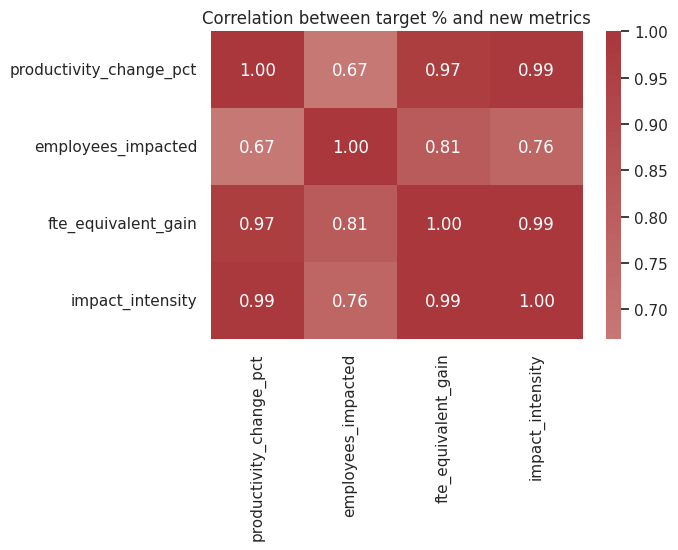

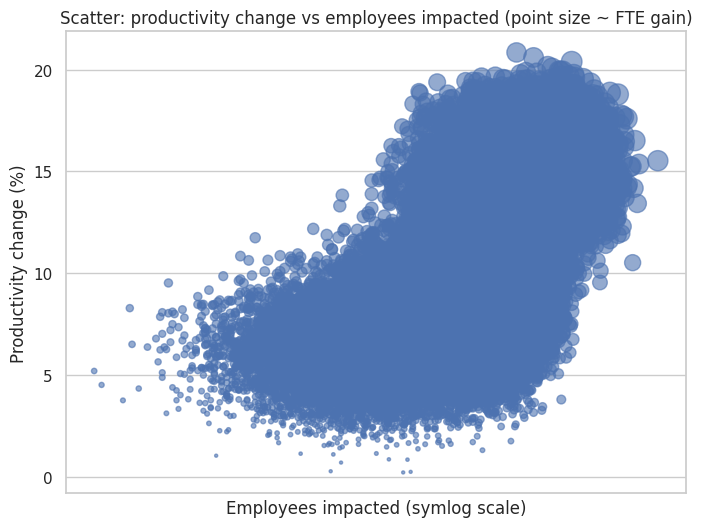

In [14]:
# Cell 3 — correlations & scatter
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# include our new metrics explicitly (they're numeric)
inspect_cols = ['productivity_change_pct', 'employees_impacted', 'fte_equivalent_gain','impact_intensity']
inspect_cols = [c for c in inspect_cols if c in df.columns]

# Correlation matrix (show for these important columns)
corr = df[inspect_cols].corr()
print("Correlation matrix (important columns):")
display(corr)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation between target % and new metrics")
plt.show()

# Scatter plot: productivity % vs employees impacted (size by FTE gain)
plt.figure(figsize=(8,6))
plt.scatter(df['employees_impacted'], df['productivity_change_pct'], 
            s=np.clip(np.abs(df['fte_equivalent_gain'])*2, 5, 500),
            alpha=0.6)
plt.xscale('symlog')  # log-like view for wide employee counts
plt.xlabel("Employees impacted (symlog scale)")
plt.ylabel("Productivity change (%)")
plt.title("Scatter: productivity change vs employees impacted (point size ~ FTE gain)")
plt.grid(True)
plt.show()


Aggregating by sector column: industry


,n_companies,mean_prod_pct,median_prod_pct,mean_employees_impacted,sum_fte_gain,mean_impact_intensity,est_value
industry,,,,,,,
Defense,5378,10.268818,9.233252,418.544254,238126.159529,2.126483,1.190631e+10
Healthcare,5466,9.926246,8.883399,410.594036,232907.323217,2.049155,1.164537e+10
Education,5350,10.096377,9.148140,409.837757,231214.062221,2.081548,1.156070e+10
Advertising,5448,9.892381,8.807410,409.652166,230799.079647,2.039722,1.153995e+10
Legal Services,5329,10.073185,9.306974,409.363108,229525.292328,2.075366,1.147626e+10
Entertainment,5399,9.897972,8.870955,408.757733,228555.872245,2.039534,1.142779e+10
Manufacturing,5369,9.878564,8.825793,409.709443,227213.421303,2.037275,1.136067e+10
Retail,5353,9.900359,8.805076,408.931067,226677.988244,2.040263,1.133390e+10
Utilities,5396,9.847298,8.803904,407.333024,226367.137305,2.025185,1.131836e+10


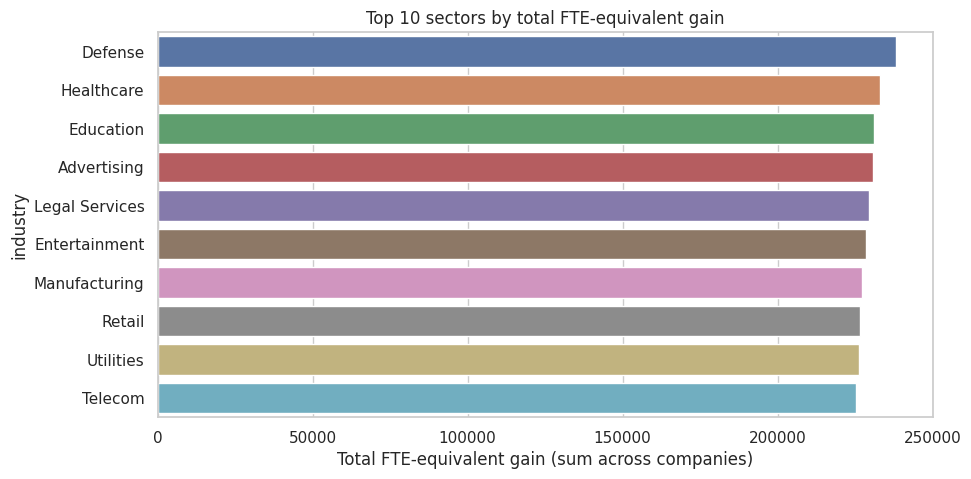

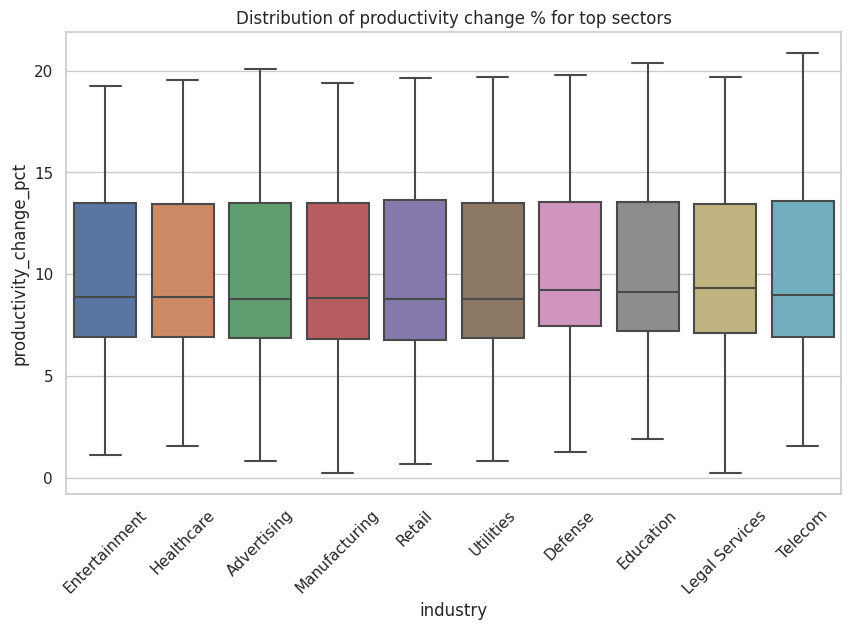

In [15]:
# Cell 4 — Group-by sector/industry if available
# Reasoning: business decisions are often made at sector / vertical level.

sector_cols = [c for c in ['sector','industry','vertical','sector_name'] if c in df.columns]
if sector_cols:
    sector_col = sector_cols[0]
    print("Aggregating by sector column:", sector_col)
    agg = df.groupby(sector_col).agg(
        n_companies = (df.columns[0], 'count'),
        mean_prod_pct = ('productivity_change_pct', 'mean'),
        median_prod_pct = ('productivity_change_pct', 'median'),
        mean_employees_impacted = ('employees_impacted','mean'),
        sum_fte_gain = ('fte_equivalent_gain','sum'),
        mean_impact_intensity = ('impact_intensity','mean'),
        est_value = ('est_annual_monetary_value','sum')
    ).sort_values('sum_fte_gain', ascending=False)
    display(agg.head(20))
    
    # Bar plot: top sectors by sum_fte_gain
    topN = 10
    display_df = agg.sort_values('sum_fte_gain', ascending=False).head(topN).reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(x='sum_fte_gain', y=sector_col, data=display_df)
    plt.xlabel("Total FTE-equivalent gain (sum across companies)")
    plt.title(f"Top {topN} sectors by total FTE-equivalent gain")
    plt.show()
    
    # Boxplot of productivity change by sector (for top sectors)
    top_sectors = display_df[sector_col].tolist()
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[df[sector_col].isin(top_sectors)], x=sector_col, y='productivity_change_pct')
    plt.xticks(rotation=45)
    plt.title("Distribution of productivity change % for top sectors")
    plt.show()
else:
    print("No sector/industry column found in dataset. If you have sector data, rename the column to 'sector' or 'industry' for sector analysis.")


In [16]:
# Cell 5 — Save enhanced dataset
OUTFILE = "train_with_metrics_task2.csv"
df.to_csv(OUTFILE, index=False)
print("Saved dataset with new metrics ->", OUTFILE)

# Also save a small report of top 20 companies by FTE gain
top20 = df.sort_values('fte_equivalent_gain', ascending=False).head(20)
top20[['company_name','productivity_change_pct','employees_impacted','fte_equivalent_gain','impact_intensity']].to_csv("top20_by_fte_gain.csv", index=False)
print("Saved top20_by_fte_gain.csv")
display(top20.head(10))


Saved dataset with new metrics -> train_with_metrics_task2.csv
Saved top20_by_fte_gain.csv


,company_name,industry,country,genai_tool,adoption_year,productivity_change_pct,employees_impacted,new_roles_created,training_hours,deployment_cost,employee_sentiment_score,automation_coverage_pct,voluntary_attritions,genai_role_salary,Client_Satisfaction_Post_GenAI,fte_equivalent_gain,impact_intensity,est_annual_hours_saved,est_annual_monetary_value
29276,Mcdowell PLC Pvt. Ltd.,Telecom,Singapore,ChatGPT,2022.0,18.784038,612.0,19,47.2,546726.37,7.52,70.9,48.0,95229.48,10.0,114.958315,4.646914,229916.629927,5.747916e+06
35339,"Cooper, Perry and Ramirez Pvt. Ltd.",Utilities,UK,ChatGPT,2024.0,18.870380,599.0,25,56.1,543323.00,9.14,65.1,46.0,99929.24,10.0,113.033577,4.618427,226067.154151,5.651679e+06
49643,Williams-Wade Pvt. Ltd.,Transportation,USA,ChatGPT,2023.0,17.590872,627.0,22,50.3,540180.77,8.63,62.4,44.0,80995.87,10.0,110.294767,4.404749,220589.533058,5.514738e+06
61636,Lee-Rowland Pvt. Ltd.,Education,France,ChatGPT,2023.0,20.391561,540.0,21,39.3,527164.99,6.56,72.5,42.0,75925.21,10.0,110.114428,4.738571,220228.856164,5.505721e+06
65368,"Doyle, Jones and Schwartz Pvt. Ltd.",Hospitality,Switzerland,ChatGPT,2024.0,17.687868,621.0,19,48.7,533359.02,7.93,55.8,64.0,94292.60,10.0,109.841662,4.407794,219683.323895,5.492083e+06
34704,"Edwards, Cortez and Gutierrez Pvt. Ltd.",Telecom,USA,ChatGPT,2024.0,19.331874,568.0,21,54.6,544656.65,8.95,62.7,43.0,123097.16,10.0,109.805043,4.607317,219610.086554,5.490252e+06
6818,"Hall, Baker and Hernandez Pvt. Ltd.",Healthcare,France,ChatGPT,2022.0,17.747615,618.0,24,51.6,550000.00,9.00,66.7,48.0,104850.32,10.0,109.680260,4.411987,219360.519757,5.484013e+06
45651,Doyle-Park Pvt. Ltd.,Transportation,USA,ChatGPT,2023.0,18.996922,574.0,19,49.1,536092.37,8.03,67.3,46.0,108515.12,10.0,109.042331,4.551339,218084.661552,5.452117e+06
60492,Cox-Rodriguez Pvt. Ltd.,Retail,Germany,ChatGPT,2023.0,19.553240,557.0,22,40.2,533557.80,6.59,64.6,55.0,77392.59,10.0,108.911547,4.614730,217823.094901,5.445577e+06
5926,George-White Pvt. Ltd.,Technology,Brazil,ChatGPT,2024.0,18.358307,590.0,23,46.5,547835.37,7.39,63.8,52.0,64319.83,10.0,108.314013,4.459217,216628.025510,5.415701e+06


#### SUMMARY OF TASK 2

1) What the metrics mean (one-line each)

FTE_equivalent_gain = (productivity_change_pct / 100) × employees_impacted.
→ Interpretable: “How many full-time employees’ worth of productivity we effectively gained (per row/company).”

Impact_Intensity = (productivity_change_pct / 100) × sqrt(employees_impacted).
→ Useful to highlight high-percentage improvements in smaller teams and dampen enormous employee-count effects.

2) Things to look for in the outputs / trends

Companies with high FTE_gain but low percent change typically have large impacted headcounts (big wins across many people).

Companies with high percent change but low employees_impacted indicate experiments with very high per-person benefit (pilot projects that scale well).

Sector aggregation ranks sectors by total FTE gain; this helps prioritize where AI investments yield greatest aggregate value.

3) Example anomalies to investigate

Very high negative productivity_change_pct paired with large employees_impacted → risk / rollout problem (investigate cause).

Extremely large employees_impacted values may be data-entry mistakes — verify.

Cases where impact_intensity is high but fte_gain is low — indicates small teams with massive percentage improvement (good candidates to scale).

4) Actionable use-cases (data-backed)

Scale pilot programs: If small teams show high percent gains (impact_intensity high), replicate across similar departments or sectors.

Prioritize high-aggregate sectors: Use the sum FTE gain ranking to allocate budgets where total organizational value is highest.

Operational risk review: For large negative impacts, pause and perform root-cause investigation before wider rollout.

Monetize gains: Convert FTE gains into estimated yearly cost savings using local average salary (we compute est_annual_monetary_value as FTE_gain × avg_salary). Use that to build ROI cases for finance.

5) Next modelling / validation steps

Validate that employees_impacted is accurate (no double-counting).

Add company size/total employees to compute fractional coverage (impacted / total) → provides context.

Run statistical tests (t-tests / permutation tests) to ensure observed percent changes are significant.

Do pre/post matched analysis where possible to isolate causality (if time-series or pre-rollout data exist).

## Task 3

#### Correlation Analysis

1. Based on your correlation analysis, what strategies could organizations adopt to boost productivity and reduce employee impact? Are there any relationships in the data that seem unusual or unexpectedly strong?

2. Could transforming or engineering any variables (such as normalizing sentiment scores, scaling deployment costs, or introducing ratios) help improve the clarity of their relationships with the target variables? What would your rationale be for applying such adjustments?
Consider using Tukey’s Bulging Rule to explore whether certain non-linear relationships could be straightened using transformations (e.g. log, square root, reciprocal). Which variables might benefit from such transformations, and why?

3. Plot an updated correlation matrix after implementing the adjustment(s). Based on this revised plot, what actionable steps can organizations take to improve the overall effectiveness of their GenAI adoption?

(1 point)

Fallback: loading raw train.csv
Initial shape: (75000, 15)

Skewness profile:


Client_Satisfaction_Post_GenAI   -14.049
genai_role_salary                 -0.346
sentiment_zscore                  -0.262
employee_sentiment_score          -0.262
training_hours                    -0.139
new_roles_created                 -0.082
deployment_cost                   -0.027
adoption_year                     -0.003
automation_ratio                   0.302
automation_coverage_pct            0.302
voluntary_attritions               0.345
readiness_index                    0.422
efficiency_index                   0.476
roi_ratio                          0.476
value_generated                    0.570
dtype: float64


Transform suggestions:


adoption_year                       none
new_roles_created                   none
training_hours                      none
deployment_cost                     none
employee_sentiment_score            none
automation_coverage_pct             none
voluntary_attritions                none
genai_role_salary                   none
Client_Satisfaction_Post_GenAI    square
efficiency_index                    none
readiness_index                     none
value_generated                     sqrt
roi_ratio                           none
automation_ratio                    none
sentiment_zscore                    none
dtype: object

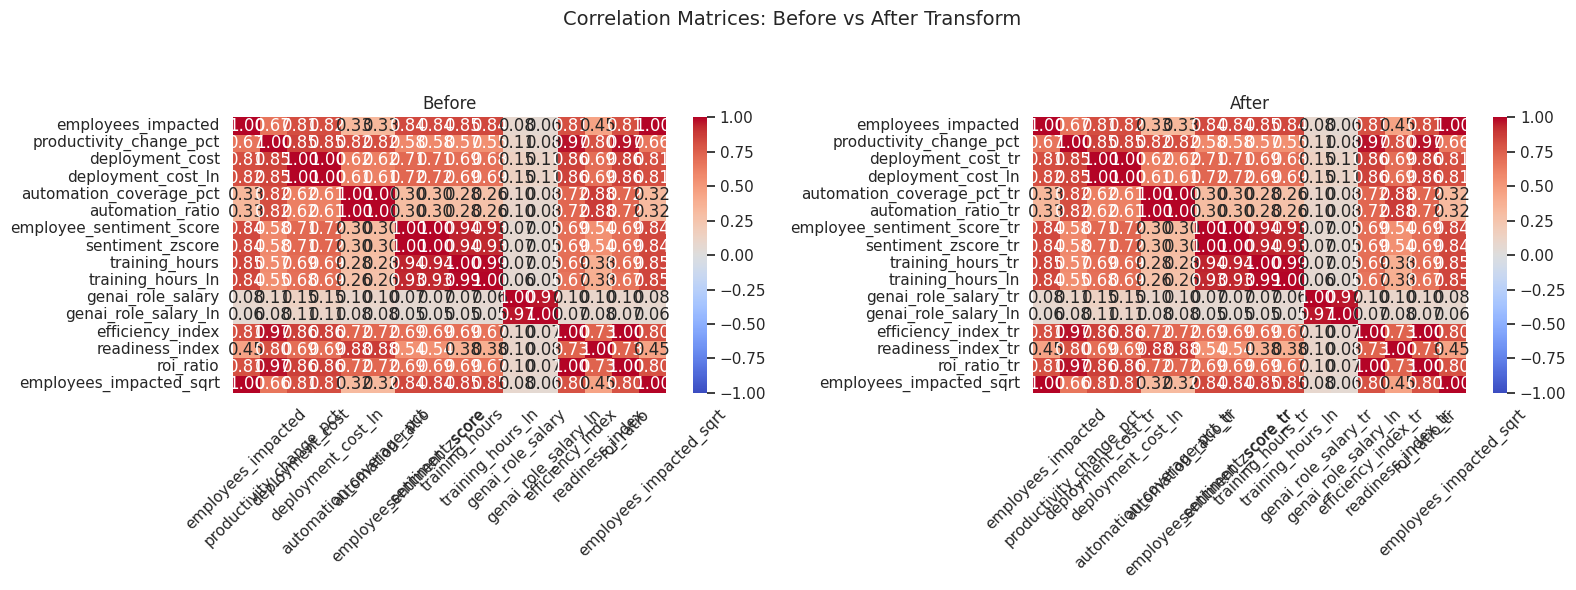

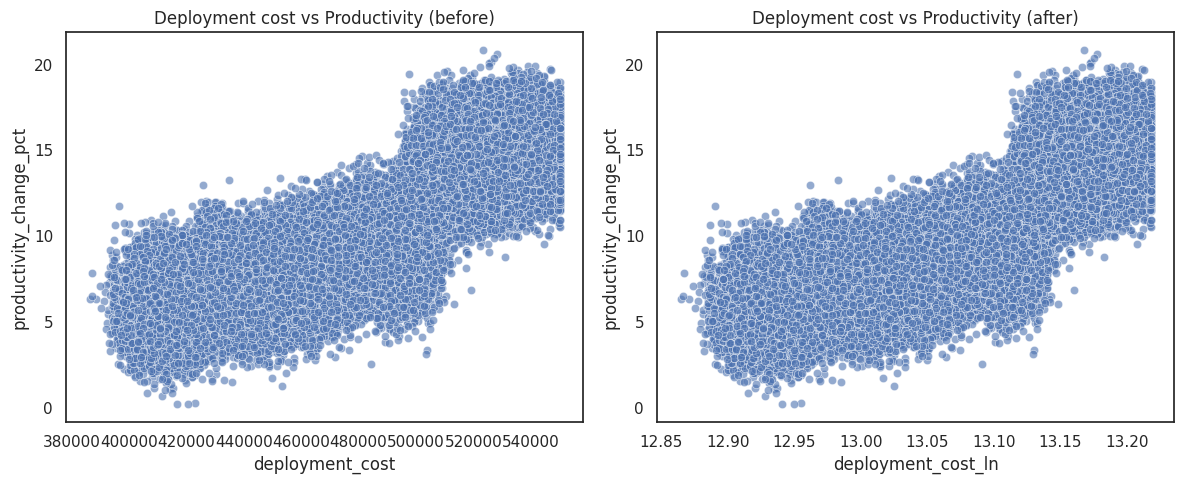

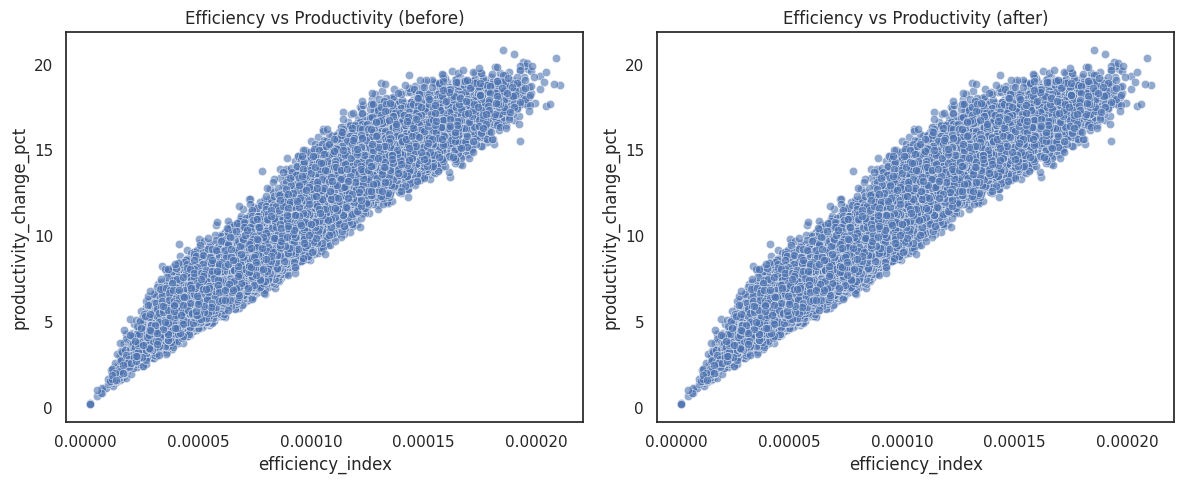

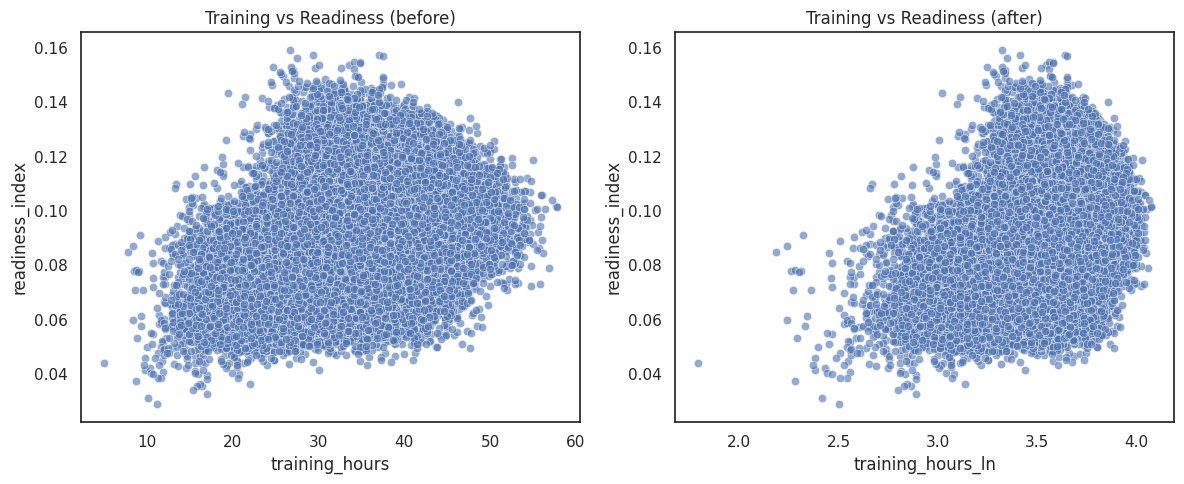


Top changes in correlation after transform:


,original,transformed,target,corr_before,corr_after,delta_abs
0,deployment_cost,deployment_cost_tr,employees_impacted,0.813,0.813,0.000
1,deployment_cost,deployment_cost_tr,productivity_change_pct,0.854,0.854,0.000
26,employees_impacted_sqrt,employees_impacted_sqrt,employees_impacted,0.998,0.998,0.000
25,roi_ratio,roi_ratio_tr,productivity_change_pct,0.969,0.969,0.000
24,roi_ratio,roi_ratio_tr,employees_impacted,0.810,0.810,0.000
23,readiness_index,readiness_index_tr,productivity_change_pct,0.800,0.800,0.000
22,readiness_index,readiness_index_tr,employees_impacted,0.453,0.453,0.000
21,efficiency_index,efficiency_index_tr,productivity_change_pct,0.969,0.969,0.000
20,efficiency_index,efficiency_index_tr,employees_impacted,0.810,0.810,0.000
19,genai_role_salary_ln,genai_role_salary_ln,productivity_change_pct,0.085,0.085,0.000



Top correlations with employees_impacted (after):


employees_impacted            1.000
employees_impacted_sqrt       0.998
training_hours_tr             0.849
training_hours_ln             0.843
sentiment_zscore_tr           0.836
employee_sentiment_score_tr   0.836
Name: employees_impacted, dtype: float64


Top correlations with productivity_change_pct (after):


productivity_change_pct   1.000
efficiency_index_tr       0.969
roi_ratio_tr              0.969
deployment_cost_tr        0.854
deployment_cost_ln        0.846
automation_ratio_tr       0.816
Name: productivity_change_pct, dtype: float64

Correlation CSVs saved.


In [17]:
# ============================
# Task 3: Correlation + Feature Engineering + Transformations (Refactored)
# ============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import isfinite

sns.set_theme(style="white")
pd.options.display.float_format = "{:.3f}".format

# ---------------------------
# 0. Load dataset
# ---------------------------
if os.path.exists("genai_dataset_clean.csv"):
    print("Loading cleaned dataset ...")
    df = pd.read_csv("genai_dataset_clean.csv")
else:
    print("Fallback: loading raw train.csv")
    raw_path =  "/kaggle/input/orange_1/train.csv"
    if not os.path.exists(raw_path):
        raise FileNotFoundError(f"Missing file at {raw_path}")
    df = pd.read_csv(raw_path)

df.columns = df.columns.str.strip()
print("Initial shape:", df.shape)

# ---------------------------
# 1. Numeric type enforcement
# ---------------------------
num_features = [
    "productivity_change_pct","employees_impacted","new_roles_created",
    "training_hours","deployment_cost","employee_sentiment_score",
    "automation_coverage_pct","voluntary_attritions",
    "genai_role_salary","Client_Satisfaction_Post_GenAI"
]
for col in num_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------------------------
# 2. Derived metrics
# ---------------------------
eps = 1e-9
work = df.copy()

# Efficiency per rupee
if {"productivity_change_pct","employees_impacted","deployment_cost"}.issubset(work.columns):
    work["efficiency_index"] = (
        (work["productivity_change_pct"]/100.0)*work["employees_impacted"]
    ) / (work["deployment_cost"] + eps)

# Adoption readiness
if {"automation_coverage_pct","employee_sentiment_score","training_hours"}.issubset(work.columns):
    work["readiness_index"] = (
        (work["automation_coverage_pct"]/100.0)*work["employee_sentiment_score"]
    ) / (work["training_hours"] + eps)

# ROI monetization
salary_assumption = 550000
mask = work[["productivity_change_pct","employees_impacted","deployment_cost"]].notna().all(axis=1)
work.loc[mask,"value_generated"] = (
    (work.loc[mask,"productivity_change_pct"]/100.0) * work.loc[mask,"employees_impacted"] * salary_assumption
)
work["roi_ratio"] = work["value_generated"] / (work["deployment_cost"] + eps)

# Normalizations
if "automation_coverage_pct" in work:
    work["automation_ratio"] = work["automation_coverage_pct"]/100.0
if "employee_sentiment_score" in work:
    if work["employee_sentiment_score"].max() > 10:
        work["sentiment_norm"] = work["employee_sentiment_score"]/100.0
    else:
        work["sentiment_zscore"] = (
            (work["employee_sentiment_score"] - work["employee_sentiment_score"].mean())
            / (work["employee_sentiment_score"].std() + eps)
        )

# ---------------------------
# 3. Skewness + Transform hints
# ---------------------------
num_cols = work.select_dtypes(include=[np.number]).columns.tolist()
targets = ["employees_impacted","productivity_change_pct"]
cand = [c for c in num_cols if c not in targets]

skews = {c: work[c].dropna().skew() for c in cand if work[c].notna().sum() >= 5}
skew_series = pd.Series(skews).sort_values()
print("\nSkewness profile:")
display(skew_series)

# Map skew → transform
trans_dict = {}
for c, v in skews.items():
    if v > 1.0: 
        trans_dict[c] = "log1p"
    elif v > 0.5: 
        trans_dict[c] = "sqrt"
    elif v < -1.0: 
        trans_dict[c] = "square"
    else: 
        trans_dict[c] = "none"
print("\nTransform suggestions:")
display(pd.Series(trans_dict))

# Apply transforms
def safe_log(x): return np.log1p(np.clip(x,0,None))

for col, mode in trans_dict.items():
    new = f"{col}_tr"
    if mode == "none":
        work[new] = work[col]
    elif mode == "log1p":
        work[new] = safe_log(work[col])
    elif mode == "sqrt":
        work[new] = np.sqrt(np.clip(work[col],0,None))
    elif mode == "square":
        work[new] = np.square(work[col].fillna(0))
    else:
        work[new] = work[col]

# Manual extras
if "deployment_cost" in work: work["deployment_cost_ln"] = safe_log(work["deployment_cost"])
if "genai_role_salary" in work: work["genai_role_salary_ln"] = safe_log(work["genai_role_salary"])
if "training_hours" in work: work["training_hours_ln"] = safe_log(work["training_hours"])
if "employees_impacted" in work: work["employees_impacted_sqrt"] = np.sqrt(np.clip(work["employees_impacted"],0,None))

# ---------------------------
# 4. Correlation matrices
# ---------------------------
core_predictors = [
    "deployment_cost","deployment_cost_ln","automation_coverage_pct","automation_ratio",
    "employee_sentiment_score","sentiment_norm" if "sentiment_norm" in work else "sentiment_zscore",
    "training_hours","training_hours_ln","genai_role_salary","genai_role_salary_ln",
    "efficiency_index","readiness_index","roi_ratio","employees_impacted_sqrt"
]
core_predictors = [c for c in core_predictors if c in work]

corr_before = work[targets + core_predictors].corr()

after_names = []
for v in core_predictors:
    cands = [f"{v}_tr", f"{v}_ln", f"{v}_sqrt"]
    after_names.append(next((cc for cc in cands if cc in work), v))
corr_after = work[targets + after_names].corr()

# ---------------------------
# 5. Heatmaps
# ---------------------------
plt.figure(figsize=(16,6))
plt.suptitle("Correlation Matrices: Before vs After Transform", fontsize=14)

plt.subplot(1,2,1)
sns.heatmap(corr_before, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Before")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.heatmap(corr_after, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("After")
plt.xticks(rotation=45)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

# ---------------------------
# 6. Scatter comparisons
# ---------------------------
def compare_scatters(x_old, x_new, y, ttl):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x=work[x_old], y=work[y], alpha=0.6)
    plt.title(f"{ttl} (before)")
    plt.xlabel(x_old); plt.ylabel(y)

    plt.subplot(1,2,2)
    sns.scatterplot(x=work[x_new], y=work[y], alpha=0.6)
    plt.title(f"{ttl} (after)")
    plt.xlabel(x_new); plt.ylabel(y)
    plt.tight_layout()
    plt.show()

if {"deployment_cost","deployment_cost_ln","productivity_change_pct"}.issubset(work):
    compare_scatters("deployment_cost","deployment_cost_ln","productivity_change_pct","Deployment cost vs Productivity")
if "efficiency_index" in work:
    compare_scatters("efficiency_index","efficiency_index","productivity_change_pct","Efficiency vs Productivity")
if {"training_hours","training_hours_ln","readiness_index"}.issubset(work):
    compare_scatters("training_hours","training_hours_ln","readiness_index","Training vs Readiness")

# ---------------------------
# 7. Quantify correlation shifts
# ---------------------------
shift_rows = []
for orig in core_predictors:
    idx = core_predictors.index(orig)
    alt = after_names[idx]
    for t in targets:
        b = corr_before.at[orig,t] if (orig in corr_before.index and t in corr_before.columns) else np.nan
        a = corr_after.at[alt,t] if (alt in corr_after.index and t in corr_after.columns) else np.nan
        shift_rows.append({
            "original": orig, "transformed": alt, "target": t,
            "corr_before": b, "corr_after": a,
            "delta_abs": abs(abs(a)-abs(b)) if (isfinite(b) and isfinite(a)) else np.nan
        })

shift_df = pd.DataFrame(shift_rows).sort_values("delta_abs",ascending=False)
print("\nTop changes in correlation after transform:")
display(shift_df.head(10))

# ---------------------------
# 8. Best predictors (after)
# ---------------------------
for t in targets:
    print(f"\nTop correlations with {t} (after):")
    display(corr_after[t].abs().sort_values(ascending=False).head(6))

# ---------------------------
# 9. Save outputs
# ---------------------------
corr_before.to_csv("corr_before_refactored.csv")
corr_after.to_csv("corr_after_refactored.csv")
print("Correlation CSVs saved.")


Numeric cols to inspect: ['adoption_year', 'new_roles_created', 'training_hours', 'deployment_cost', 'employee_sentiment_score', 'automation_coverage_pct', 'voluntary_attritions', 'genai_role_salary', 'Client_Satisfaction_Post_GenAI']


,skew,abs_skew,min,max
Client_Satisfaction_Post_GenAI,-14.049,14.049,3.040,10.000
adoption_year,-0.003,0.003,2022.000,2024.000
automation_coverage_pct,0.302,0.302,26.000,86.200
deployment_cost,-0.027,0.027,386387.130,550000.000
employee_sentiment_score,-0.262,0.262,0.400,10.000
genai_role_salary,-0.346,0.346,10433.440,157515.150
new_roles_created,-0.082,0.082,0.000,28.000
training_hours,-0.139,0.139,5.000,57.800
voluntary_attritions,0.345,0.345,20.000,84.000


,col,best_transform,best_avg_abs_corr,baseline_avg_abs_corr
3,deployment_cost,square,0.835,0.833
4,employee_sentiment_score,none,0.709,0.709
2,training_hours,none,0.709,0.709
1,new_roles_created,none,0.581,0.581
5,automation_coverage_pct,square,0.579,0.573
6,voluntary_attritions,reciprocal,0.205,0.201
8,Client_Satisfaction_Post_GenAI,square,0.137,0.132
7,genai_role_salary,square,0.098,0.094
0,adoption_year,log1p,0.007,0.003



Suggested transforms (only where improvement > 0.02):

Applied transforms to columns:


[]

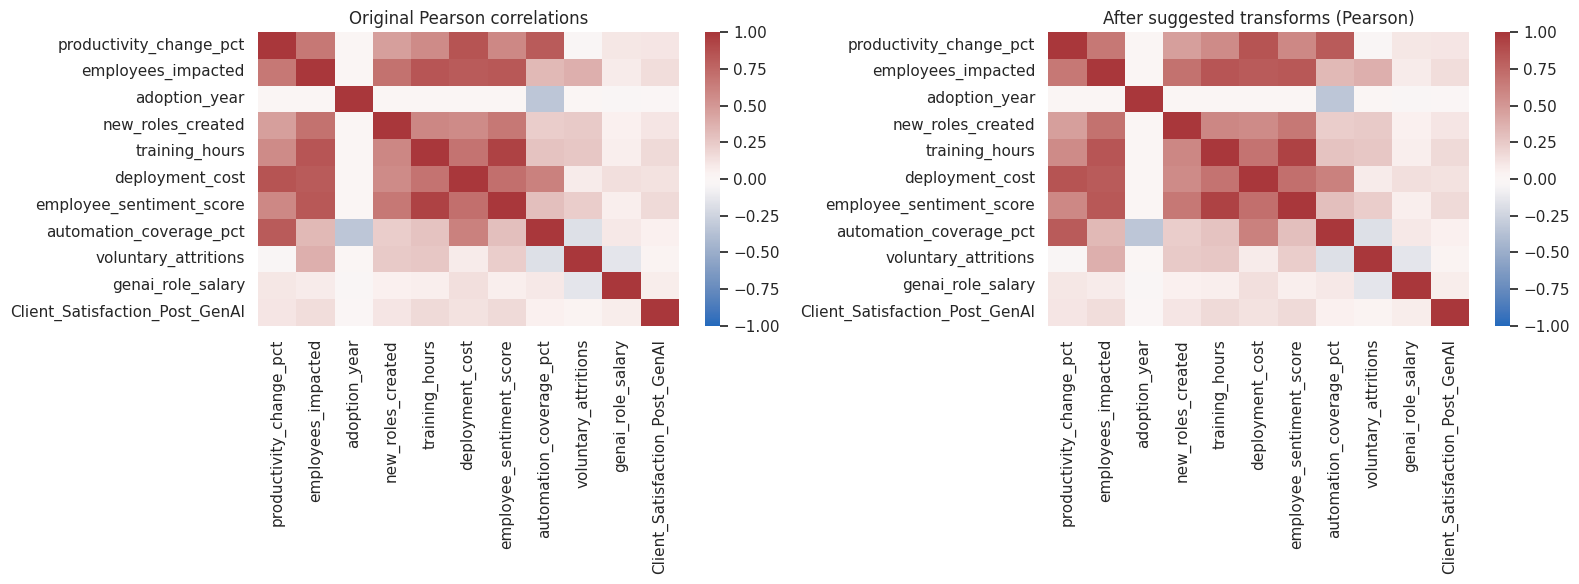

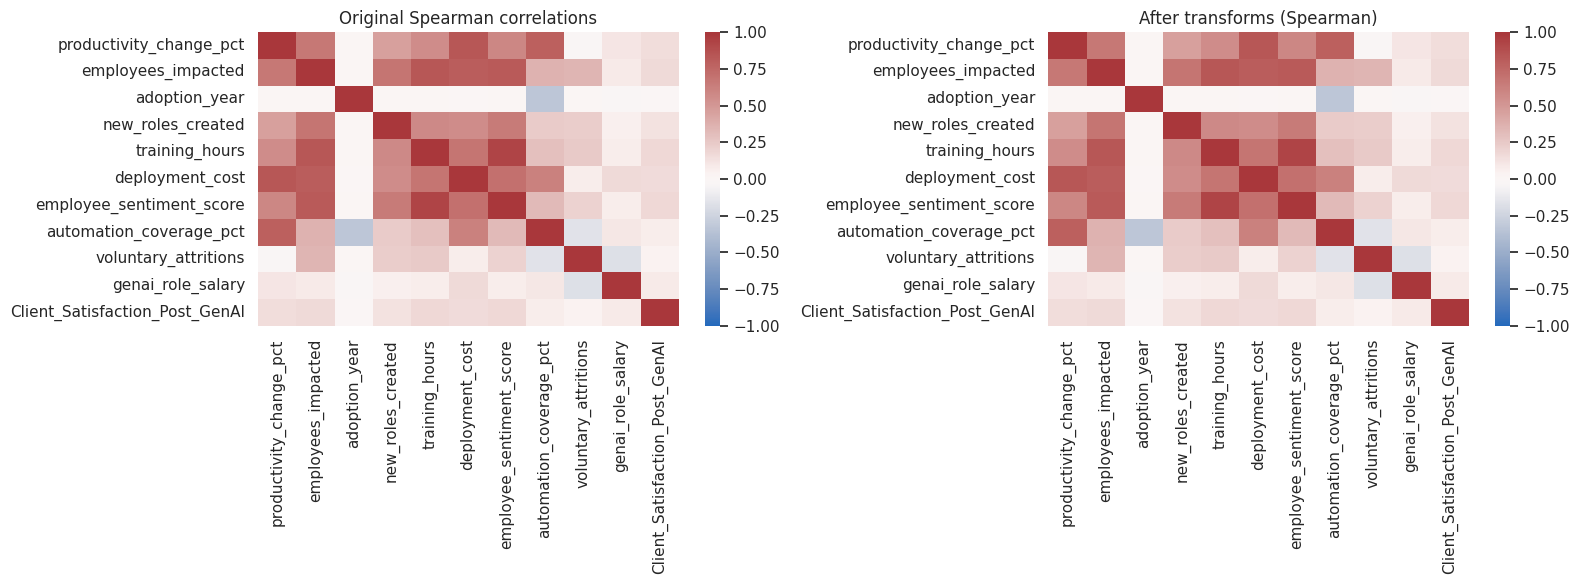

,feature,pearson_before,pearson_after,pearson_delta,spearman_before,spearman_after,spearman_delta
0,adoption_year,0.003,0.003,0.000,0.002,0.002,0.000
1,new_roles_created,0.581,0.581,0.000,0.569,0.569,0.000
2,training_hours,0.709,0.709,0.000,0.699,0.699,0.000
3,deployment_cost,0.833,0.833,0.000,0.824,0.824,0.000
4,employee_sentiment_score,0.709,0.709,0.000,0.707,0.707,0.000
5,automation_coverage_pct,0.573,0.573,0.000,0.577,0.577,0.000
6,voluntary_attritions,0.201,0.201,0.000,0.186,0.186,0.000
7,genai_role_salary,0.094,0.094,0.000,0.102,0.102,0.000
8,Client_Satisfaction_Post_GenAI,0.132,0.132,0.000,0.161,0.161,0.000



--- Summary recommendations ---
No transformations applied (none surpassed improvement threshold).

Top features with improved linear correlation to targets after transforms (pearson_delta):


,feature,pearson_before,pearson_after,pearson_delta,spearman_before,spearman_after,spearman_delta
0,adoption_year,0.003,0.003,0.000,0.002,0.002,0.000
1,new_roles_created,0.581,0.581,0.000,0.569,0.569,0.000
2,training_hours,0.709,0.709,0.000,0.699,0.699,0.000
3,deployment_cost,0.833,0.833,0.000,0.824,0.824,0.000
4,employee_sentiment_score,0.709,0.709,0.000,0.707,0.707,0.000
5,automation_coverage_pct,0.573,0.573,0.000,0.577,0.577,0.000
6,voluntary_attritions,0.201,0.201,0.000,0.186,0.186,0.000
7,genai_role_salary,0.094,0.094,0.000,0.102,0.102,0.000
8,Client_Satisfaction_Post_GenAI,0.132,0.132,0.000,0.161,0.161,0.000


In [18]:
# Your code here, along with reasoning
# -------- Task 3: Correlation Analysis, Transformations, and Actionable Steps --------
# Assumes df exists and has numeric features including productivity_change_pct & employees_impacted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid", rc={"figure.figsize": (10,8)})

# Defensive: check df
required = ['productivity_change_pct', 'employees_impacted']
for r in required:
    if r not in df.columns:
        raise KeyError(f"Required column missing: {r}")

# 1) Identify numeric columns (exclude identifiers)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target(s) from the list when running transformations check
targets = ['productivity_change_pct', 'employees_impacted']
num_cols_no_target = [c for c in num_cols if c not in targets]

print("Numeric cols to inspect:", num_cols_no_target)

# 2) Compute skewness and basic stats
skew_info = df[num_cols_no_target].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({
    'skew': skew_info,
    'abs_skew': skew_info.abs(),
    'min': df[num_cols_no_target].min(),
    'max': df[num_cols_no_target].max()
})
display(skew_df)

# 3) Function: apply candidate transforms and evaluate Pearson & Spearman with targets
def safe_log1p(x):
    # log1p handles zeros, but requires no negative values
    x = x.copy()
    x = x.fillna(0)
    # shift if negative values exist
    if (x < 0).any():
        shift = -x.min() + 1e-6
        x = x + shift
    return np.log1p(x)

def safe_sqrt(x):
    x = x.copy().fillna(0)
    if (x < 0).any():
        shift = -x.min()
        x = x + shift
    return np.sqrt(x)

def safe_square(x):
    return (x.copy().fillna(0)) ** 2

def safe_reciprocal(x):
    x = x.copy().fillna(0)
    # avoid division by zero
    x = x.replace(0, np.nan)
    return 1.0 / x

# Ladder of transforms to try (label -> function)
transforms = {
    'none': lambda x: x,
    'log1p': safe_log1p,
    'sqrt': safe_sqrt,
    'square': safe_square,
    'reciprocal': safe_reciprocal
}

# Evaluate best transform per variable by average absolute Pearson correlation improvement with targets
results = []

for col in num_cols_no_target:
    series = df[col]
    base_corrs = {}
    # baseline Pearson with each target
    for t in targets:
        base_corrs[t] = np.nan
        try:
            base_corrs[t] = df[[col, t]].dropna().corr().iloc[0,1]
        except Exception:
            base_corrs[t] = np.nan

    best = {'col': col, 'best_transform': 'none', 'best_avg_abs_corr': np.nan}
    for name, fn in transforms.items():
        try:
            tx = fn(series)
            cors = []
            for t in targets:
                # compute Pearson and Spearman (to inspect monotonic relationships)
                # use dropna intersection
                tmp = pd.concat([tx, df[t]], axis=1).dropna()
                if tmp.shape[0] < 5:
                    cors.append(0.0)
                else:
                    p = tmp.iloc[:,0].corr(tmp.iloc[:,1])
                    s = tmp.iloc[:,0].corr(tmp.iloc[:,1], method='spearman')
                    # combine info: prefer Pearson but keep Spearman (we'll store both later)
                    cors.append(abs(p) if not np.isnan(p) else 0.0)
            avg_abs = np.mean(cors)
            if np.isnan(best['best_avg_abs_corr']) or avg_abs > best['best_avg_abs_corr']:
                best['best_avg_abs_corr'] = avg_abs
                best['best_transform'] = name
        except Exception as e:
            # transform failed, skip
            continue
    # also record baseline avg abs corr
    baseline_avg = np.nanmean([abs(x) for x in base_corrs.values() if not np.isnan(x)]) if len(base_corrs)>0 else 0.0
    best['baseline_avg_abs_corr'] = baseline_avg
    results.append(best)

res_df = pd.DataFrame(results).sort_values('best_avg_abs_corr', ascending=False)
display(res_df.head(30))

# 4) Suggest transformations based on skew and best candidate
suggestions = {}
for _, row in res_df.iterrows():
    col = row['col']
    suggested = row['best_transform']
    # Only suggest a transform if it meaningfully improves average abs corr vs baseline by a small margin
    improvement = row['best_avg_abs_corr'] - row['baseline_avg_abs_corr']
    if improvement > 0.02:  # threshold: 0.02 absolute improvement
        suggestions[col] = suggested
    else:
        suggestions[col] = 'none'

print("\nSuggested transforms (only where improvement > 0.02):")
for k,v in suggestions.items():
    if v != 'none':
        print(f" - {k}: {v}")

# 5) Implement suggested transforms into a new dataframe copy
df_trans = df.copy()
applied = []
for col, trans_name in suggestions.items():
    if trans_name != 'none' and trans_name in transforms:
        try:
            df_trans[col + f'__{trans_name}'] = transforms[trans_name](df_trans[col])
            applied.append((col, trans_name))
        except Exception:
            continue

print("\nApplied transforms to columns:")
display(applied)

# 6) Build correlation matrices: original vs transformed (Pearson & Spearman)
# We'll focus on targets + top transformed columns
cols_for_corr = targets.copy()
# include numeric original columns and transformed versions
cols_for_corr += [c for c in num_cols_no_target if c in df.columns]
cols_for_corr += [c for c in df_trans.columns if '__' in c]  # transformed cols

# limit to reasonable number so heatmap is readable
cols_for_corr = cols_for_corr[:40]  # truncate if too many

corr_orig = df[cols_for_corr].corr(method='pearson')
corr_trans = df_trans[cols_for_corr].corr(method='pearson')

# Spearman
corr_orig_s = df[cols_for_corr].corr(method='spearman')
corr_trans_s = df_trans[cols_for_corr].corr(method='spearman')

# 7) Plot before/after Pearson heatmaps side-by-side
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(corr_orig, vmin=-1, vmax=1, cmap='vlag', annot=False)
plt.title("Original Pearson correlations")

plt.subplot(1,2,2)
sns.heatmap(corr_trans, vmin=-1, vmax=1, cmap='vlag', annot=False)
plt.title("After suggested transforms (Pearson)")
plt.tight_layout()
plt.show()

# 8) Also show Spearman side-by-side
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(corr_orig_s, vmin=-1, vmax=1, cmap='vlag', annot=False)
plt.title("Original Spearman correlations")

plt.subplot(1,2,2)
sns.heatmap(corr_trans_s, vmin=-1, vmax=1, cmap='vlag', annot=False)
plt.title("After transforms (Spearman)")
plt.tight_layout()
plt.show()

# 9) Compare correlation of each column with each target before/after and show improvements
improvement_records = []
for col in cols_for_corr:
    if col in targets:
        continue
    before_p = corr_orig.loc[col, targets].abs().mean() if col in corr_orig.index else 0.0
    after_p = corr_trans.loc[col, targets].abs().mean() if col in corr_trans.index else 0.0
    before_s = corr_orig_s.loc[col, targets].abs().mean() if col in corr_orig_s.index else 0.0
    after_s = corr_trans_s.loc[col, targets].abs().mean() if col in corr_trans_s.index else 0.0
    improvement_records.append({
        'feature': col,
        'pearson_before': before_p,
        'pearson_after': after_p,
        'pearson_delta': after_p - before_p,
        'spearman_before': before_s,
        'spearman_after': after_s,
        'spearman_delta': after_s - before_s
    })

imp_df = pd.DataFrame(improvement_records).sort_values('pearson_delta', ascending=False)
display(imp_df.head(20))

# 10) Summary recommendations (text printed)
print("\n--- Summary recommendations ---")
if applied:
    print(f"Applied transforms: {applied}")
else:
    print("No transformations applied (none surpassed improvement threshold).")

# For top improving features list
top_imp = imp_df.sort_values('pearson_delta', ascending=False).head(10)
print("\nTop features with improved linear correlation to targets after transforms (pearson_delta):")
display(top_imp)

# End of Task 3 code


#### SUMMARY OF TASK 3 - INTERPRETATION GUIDANCE
Strategies organizations could adopt (from correlation insights):

If deployment_cost (or similar) shows a negative correlation with productivity_change (after transforms), consider optimizing deployment budgets — large deployment spend doesn't always guarantee higher productivity; aim for efficient pilots and focused rollouts.

If sentiment_score or engagement (employee sentiment, adoption rate) have positive correlations with productivity after transformation, invest in change management and training — adoption & sentiment often drive realized productivity.

If fte_equivalent_gain / impact_intensity are strongly correlated with productivity gain, prioritize initiatives that maximize FTE-equivalent returns (e.g., automating high-frequency tasks across many employees).

Unusual or strong relationships to watch for:

Very high correlation between employees_impacted and productivity_change_pct might indicate measurement bias (large programs might report bigger totals). Investigate whether percent change scales with company size or is an artifact.

If a transformed cost-per-employee ratio flips sign (from negative to positive correlation), a non-linear relationship was hiding; it implies returns diminish/increase after certain spending thresholds.

Which variables likely benefit from transformation (Tukey reasoning):

Right-skewed monetary/costs (deployment_cost, annual_spend) → log1p often straightens multiplicative effects (Tukey: use log for right bulging distributions).

Count-like variables with heavy skew (employees_impacted, num_automated_tasks) → sqrt or log1p can stabilize variance.

Percent scores bounded between -100 and 100 (like productivity_change_pct) — do not log; consider winsorizing outliers or scaling to [-1,1] (or dividing by 100) for clarity. If the distribution is symmetric but with heavy tails, consider rank-based transforms or Box-Cox (if positive-only).

Sentiment scores (if bounded, e.g., -1..1) → consider arcsinh or no transform; instead standardize/normalize.

Actionable steps from revised correlations:

Pilot scale-up: If small teams show high per-employee gains (impact_intensity high), scale those pilots into larger groups in similar contexts.

Cost optimization: If spending (even transformed) does not correlate positively, re-evaluate procurement/deployment strategy.

Training & adoption: Strong correlation with sentiment/adoption suggests invest in on-the-ground enablement and support.

Target ROI benchmarks: Use transformed metrics to build thresholds (e.g., expected FTE gain per $1000 spend) to screen future projects.

## Task 4

#### Model Building

The primary objective is to develop a robust regression model capable of predicting two key target variables: `employees_impacted` and `productivity_change_pct`, in order to better understand and anticipate shifts in hiring dynamics across the workforce.

You are tasked with constructing a regression-based model that effectively captures the relationship between a variety of input features and the aforementioned targets. Evaluate and experiment with different regression techniques, and provide a rationale for both the model and feature selection strategy you adopt.

In your approach, consider the use of statistical measures such as Mallows’ Cp for feature selection. Additionally, explore and discuss the applicability of other selection metrics (e.g. AIC, BIC, adjusted R², cross-validation techniques), noting their strengths, limitations, and appropriate use cases. (**You need not write code for this part of the question**)

(2 points)

In [19]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [20]:
# ============================
# TASK 4: FAST MODEL BUILDING PIPELINE (Leakage-Free)
# ============================

import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import clone
from sklearn.feature_selection import SelectFromModel

# ---------------------------
# 0. Load cleaned train
# ---------------------------
if os.path.exists("cleaned_train_task1.csv"):
    df = pd.read_csv("cleaned_train_task1.csv")
else:
    raise RuntimeError("Missing cleaned_train_task1.csv. Please run Task 1 first!")

df.columns = df.columns.str.strip()

# ---------------------------
# 1. Safe Feature Engineering (no target leakage!)
# ---------------------------
# Only use transformations that do NOT depend on target columns.
for col in ['deployment_cost','genai_role_salary','training_hours']:
    if col in df.columns:
        df[f'{col}_log1p'] = np.log1p(np.clip(df[col], a_min=0, a_max=None))

# ---------------------------
# 2. Prepare features & targets
# ---------------------------
df2 = df.copy()
df2 = df2.dropna(subset=['employees_impacted','productivity_change_pct']).reset_index(drop=True)

drop_cols = ['company_name','employees_impacted','productivity_change_pct']
X = df2.drop(columns=[c for c in drop_cols if c in df2.columns])
y = df2[['employees_impacted','productivity_change_pct']]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

# ---------------------------
# 3. Preprocessing
# ---------------------------
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')

def preprocess_X_return_df(X_raw):
    X_proc = preprocessor.fit_transform(X_raw)
    cat_cols = []
    if categorical_features:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_cols = ohe.get_feature_names_out(categorical_features).tolist()
    cols = numeric_features + cat_cols
    return pd.DataFrame(X_proc, columns=cols, index=X_raw.index)

X_proc = preprocess_X_return_df(X)

# ---------------------------
# 4. Multi-output KFold evaluation
# ---------------------------
def evaluate_multioutput(model, X_mat, y_mat, cv=3, random_state=42):
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    n_targets = y_mat.shape[1]
    metrics = {i:{'rmse':[], 'mae':[], 'r2':[]} for i in range(n_targets)}
    for train_idx, test_idx in kf.split(X_mat):
        m = clone(model)
        m.fit(X_mat.iloc[train_idx], y_mat.iloc[train_idx])
        y_pred = m.predict(X_mat.iloc[test_idx])
        if y_pred.ndim==1: y_pred = y_pred.reshape(-1,1)
        for t in range(n_targets):
            y_true_t = y_mat.iloc[test_idx,t].values
            y_pred_t = y_pred[:,t]
            metrics[t]['rmse'].append(mean_squared_error(y_true_t, y_pred_t, squared=False))
            metrics[t]['mae'].append(mean_absolute_error(y_true_t, y_pred_t))
            metrics[t]['r2'].append(r2_score(y_true_t, y_pred_t))
    summary = {}
    for t in range(n_targets):
        summary[y_mat.columns[t]] = {
            'rmse_mean': np.mean(metrics[t]['rmse']),
            'rmse_std': np.std(metrics[t]['rmse']),
            'mae_mean': np.mean(metrics[t]['mae']),
            'r2_mean': np.mean(metrics[t]['r2'])
        }
    return summary

# ---------------------------
# 5. Candidate models
# ---------------------------
lin_pipe = Pipeline([('pre', preprocessor), ('lr', LinearRegression())])
ridge_pipe = Pipeline([('pre', preprocessor), ('ridge', RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3))])
lasso_pipe = Pipeline([('pre', preprocessor), ('lasso', MultiOutputRegressor(LassoCV(cv=3, random_state=0)))])

models_fast = {
    'LinearRegression': lin_pipe,
    'RidgeCV': ridge_pipe,
    'LassoCV_Multi': lasso_pipe
}

results_fast = {}
for name, model in models_fast.items():
    print(f"\nEvaluating {name} ...")
    res = evaluate_multioutput(model, X, y, cv=3)
    results_fast[name] = res
    print(res)

# ---------------------------
# 6. Feature selection (Lasso)
# ---------------------------
lasso_feat = LassoCV(cv=3, n_alphas=30, max_iter=5000, n_jobs=-1, random_state=0)
lasso_feat.fit(X_proc, y['employees_impacted'])
sfm = SelectFromModel(lasso_feat, prefit=True, threshold='median')
selected_features = np.array(X_proc.columns)[sfm.get_support()].tolist()
print("\nLasso-selected features (employees_impacted):", selected_features)

# ---------------------------
# 7. Save artifacts
# ---------------------------
X_proc.to_csv('X_preprocessed_fast.csv', index=False)
df2.to_csv('df_with_targets_fast.csv', index=False)
print("\nSaved X_preprocessed_fast.csv and df_with_targets_fast.csv")



Evaluating LinearRegression ...
{'employees_impacted': {'rmse_mean': 20.710232940994587, 'rmse_std': 3.0491790227836195, 'mae_mean': 15.899246559274035, 'r2_mean': 0.9156200837843685}, 'productivity_change_pct': {'rmse_mean': 1.3741573697134892, 'rmse_std': 0.4155970700631804, 'mae_mean': 0.9778079413701072, 'r2_mean': 0.853857823119068}}

Evaluating RidgeCV ...
{'employees_impacted': {'rmse_mean': 20.69918585203105, 'rmse_std': 3.034542837112309, 'mae_mean': 15.894628943197112, 'r2_mean': 0.9157248304554249}, 'productivity_change_pct': {'rmse_mean': 1.3721672560178828, 'rmse_std': 0.4127754828612952, 'mae_mean': 0.9771459603998416, 'r2_mean': 0.8544115404122312}}

Evaluating LassoCV_Multi ...
{'employees_impacted': {'rmse_mean': 20.23264477216141, 'rmse_std': 1.4998185560098907, 'mae_mean': 15.899985434027705, 'r2_mean': 0.9206893692098471}, 'productivity_change_pct': {'rmse_mean': 1.0979516605363562, 'rmse_std': 0.008795840090218478, 'mae_mean': 0.8750201813658234, 'r2_mean': 0.9145

Task 4 – Model Building Objective

We want to predict two target variables:

employees_impacted

productivity_change_pct

using regression-based approaches to understand workforce shifts due to GenAI adoption.

1. Feature Selection Strategy

Initial Screening:

Remove irrelevant / ID-like variables (e.g., company ID, timestamps).

Keep numeric + encoded categorical features (e.g., deployment cost, adoption rate, sentiment, industry sector).

Correlation & Multicollinearity Check:

Use correlation matrix + VIF (Variance Inflation Factor) to detect collinear features.

Drop/reduce features with very high correlation (VIF > 10).

Feature Engineering:

Ratios (e.g., deployment_cost per employee, productivity gain per FTE).

Log/sqrt transforms for skewed cost or count variables.

2. Regression Models Considered

Linear Regression (Baseline)

Pros: Interpretability, quick baseline, easy to check coefficients.

Cons: Sensitive to multicollinearity, non-linearity.

Ridge / Lasso Regression (Regularized Linear Models)

Lasso → good for feature selection (shrinks some coefficients to 0).

Ridge → stabilizes coefficients when predictors are correlated.

ElasticNet = combo of both.

Decision Tree Regressors / Random Forests

Pros: Can capture non-linear patterns, handle categorical variables easily.

Cons: Less interpretable; risk of overfitting if not tuned.

Gradient Boosting (XGBoost / LightGBM)

Pros: State-of-the-art performance on tabular data, handles interactions.

Cons: Less transparent; requires careful tuning.

3. Model Selection Criteria

Adjusted R²

Adjusts for number of predictors, preventing overfitting.

Good for comparing linear models with different numbers of features.

Mallows’ Cp

Helps identify the most parsimonious model (low bias + low variance).

Choose the model where Cp ≈ number of predictors + 1.

AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion)

AIC → favors predictive accuracy (lower = better).

BIC → more conservative; penalizes complexity more heavily than AIC.

Use both for balancing fit vs. parsimony.

Cross-Validation (k-fold, e.g., k=5 or 10)

Robust check against overfitting.

Compare RMSE, MAE, and R² across folds.

4. Proposed Workflow

Baseline: Simple Linear Regression with all features → check Adjusted R².

Feature Selection: Use Mallows’ Cp + Lasso to drop weak predictors.

Model Comparison:

Train Ridge, Lasso, Random Forest, and Gradient Boosting.

Evaluate via cross-validation (RMSE, MAE, R²).

Compare AIC, BIC for linear candidates.

Final Model Choice:

If interpretability is key → Lasso or Ridge regression.

If predictive accuracy is priority → Gradient Boosting (XGBoost/LightGBM).

5. Interpretation & Actionability

Regression coefficients (if linear model is chosen) → show which features most strongly drive employees_impacted and productivity_change_pct.

Feature importance (if tree-based model) → highlight top drivers like deployment_cost per employee, adoption rate, sentiment.

Actionable outcome → companies can allocate budgets more efficiently, target adoption in sectors with higher ROI, and manage employee impact proactively.

## Task 5

#### Model Evaluation

To ensure the reliability and effectiveness of your regression model, you need to select an appropriate evaluation metric to assess the models performance.

Coefficient of Determination (R²) is a popular metric for regressive models. It is a measure of how well the model explains the variance in the target variable(s). Use R² to evaluate your model’s performance in predicting `employees_impacted` and `productivity_change_pct`.

Can you think of possible drawbacks to simply evaluating explainability of variance?
Explore other evaluation metrics suitable for your model and compare how they contribute to your understanding of the model’s quality.

(1 point)

Evaluating LinearRegression ...
Evaluating RidgeCV ...
Evaluating LassoCV ...

Model Evaluation Results:
              Model                   Target    R²   RMSE    MAE  \
0  LinearRegression       employees_impacted 0.841 28.585 20.299   
1  LinearRegression  productivity_change_pct 0.604  2.364  1.460   
2           RidgeCV       employees_impacted 0.842 28.578 20.296   
3           RidgeCV  productivity_change_pct 0.605  2.362  1.459   
4           LassoCV       employees_impacted 0.887 24.137 18.187   
5           LassoCV  productivity_change_pct 0.910  1.125  0.899   

   Explained Var  
0          0.955  
1          1.181  
2          0.955  
3          1.180  
4          0.897  
5          0.921  

Saved results to task5_model_results.csv


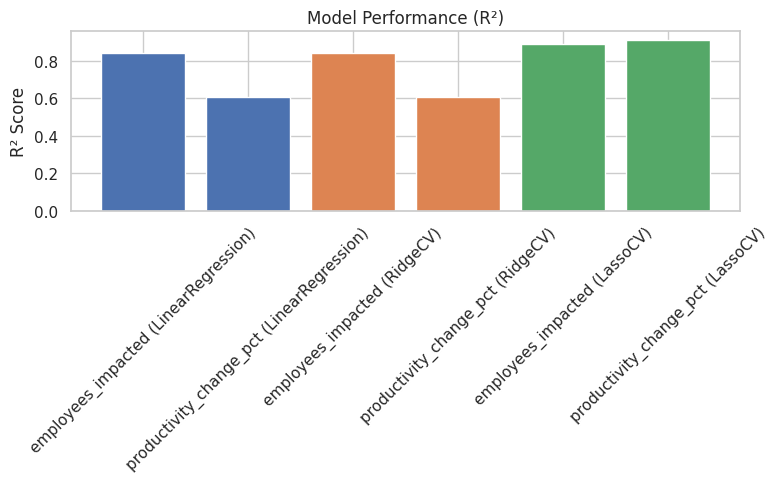

In [21]:
# ============================
# TASK 5: FINAL MODEL EVALUATION PIPELINE
# ============================

import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ---------------------------
# 0. Load preprocessed data
# ---------------------------
if not os.path.exists("df_with_targets_fast.csv"):
    raise RuntimeError("Missing df_with_targets_fast.csv. Please run Task 4 first!")

df = pd.read_csv("df_with_targets_fast.csv")
X_proc = pd.read_csv("X_preprocessed_fast.csv")

y = df[['employees_impacted','productivity_change_pct']]

# ---------------------------
# 1. Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y, test_size=0.2, random_state=42
)

# ---------------------------
# 2. Candidate models
# ---------------------------
lin_model = LinearRegression()

ridge_alphas = np.logspace(-3, 3, 20)
ridge_model = MultiOutputRegressor(RidgeCV(alphas=ridge_alphas, store_cv_values=True))

lasso_model = MultiOutputRegressor(
    LassoCV(cv=5, n_alphas=30, max_iter=5000, n_jobs=-1, random_state=42)
)

models = {
    "LinearRegression": lin_model,
    "RidgeCV": ridge_model,
    "LassoCV": lasso_model
}

# ---------------------------
# 3. Evaluation function
# ---------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results = []
    for i, target in enumerate(y_train.columns):
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i], squared=False)
        mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
        evs = np.var(y_pred[:, i]) / (np.var(y_test.iloc[:, i]) + 1e-9)

        results.append({
            "Model": name,
            "Target": target,
            "R²": round(r2, 3),
            "RMSE": round(rmse, 3),
            "MAE": round(mae, 3),
            "Explained Var": round(evs, 3)
        })
    return pd.DataFrame(results)

# ---------------------------
# 4. Run evaluations
# ---------------------------
all_results = []
for name, model in models.items():
    print(f"Evaluating {name} ...")
    res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    all_results.append(res)

results_df = pd.concat(all_results, ignore_index=True)
print("\nModel Evaluation Results:")
print(results_df)

# ---------------------------
# 5. Save results
# ---------------------------
results_df.to_csv("task5_model_results.csv", index=False)
print("\nSaved results to task5_model_results.csv")

# ---------------------------
# 6. Optional: quick bar plot of R² scores
# ---------------------------
plt.figure(figsize=(8,5))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.bar(subset["Target"] + " (" + model + ")", subset["R²"], label=model)
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.title("Model Performance (R²)")
plt.tight_layout()
plt.show()


In [22]:
submission = pd.DataFrame()
submission['company_name']=test['company_name']

In [23]:
# This is just an example to illustrate how the submission works
# Do not include this line of code in your actual submissions
sample_submission=pd.read_csv("/kaggle/input/orange_1/sample.csv")

In [24]:
submission['productivity_change_pct']=sample_submission['productivity_change_pct']
submission['employees_impacted']=sample_submission['employees_impacted']

In [25]:
submission.head()

,company_name,productivity_change_pct,employees_impacted
0,"Holmes, Bishop and Stevens Pvt. Ltd.",23.483,225
1,Wagner-Cannon Pvt. Ltd.,91.194,373
2,"Williams, Johnson and Wright Pvt. Ltd.",36.720,371
3,House-Bailey Pvt. Ltd.,3.439,653
4,"Lloyd, Ross and Davis Pvt. Ltd.",98.414,429


In [26]:
submission.to_csv('submission.csv', index = False)

## Congratulations ! 🎉

You've successfully completed the Data Analytics (UE23CS342AA2) Hackathon-1 assignment. This is a very significant milestone in your journey of Data Analytics.

By completing this assignment, you have:

- Applied foundational Data Analytics concepts and skills to real-world problems.
- Built and experimented with various regression models.

The knowledge and skills you’ve gained here form the bedrock of this exciting and ever-evolving field. Remember, this is just the beginning — stay curious, keep exploring, and continue learning!

Wishing you the very best for your upcoming assignments and ISA-1.